In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import sklearn

In [2]:
np.random.seed(42)

plt.rcParams['figure.figsize'] = (12, 8)
sns.set_theme(style='whitegrid')

<h1 style="text-align: center">Ames House Price Prediction: EDA</h1>
<center><img style="height: 450px" src="https://livability.com/sites/default/files/151SUBAME031.jpg"></center>

<p style="text-align: center">
In this notebook, we will be exploring factores that impacted house sale price in Ames, Iowa. <br/>
The goal of this part is to make sense of provided dataset and turn these insights into actions during the second modeling part. <br/>
Along the way, we will try to dig into real estate domain logic as deep as we can explaining different relations between variables. We are doing this just for fun and it's not required to pass this competion well.
</p>

In [3]:
trainDf = train_df = pd.read_csv('data/train.csv')
testDf = test_df = pd.read_csv('data/test.csv')

fullDf = full_df = pd.concat([train_df, test_df], sort=True).reset_index(drop=True)

## Dataset Overview

Given training dataset has:
* a vast number of features (**80**)
* a small number of training examples (**2918**)

In [4]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       2919 non-null   int64  
 1   2ndFlrSF       2919 non-null   int64  
 2   3SsnPorch      2919 non-null   int64  
 3   Alley          198 non-null    object 
 4   BedroomAbvGr   2919 non-null   int64  
 5   BldgType       2919 non-null   object 
 6   BsmtCond       2837 non-null   object 
 7   BsmtExposure   2837 non-null   object 
 8   BsmtFinSF1     2918 non-null   float64
 9   BsmtFinSF2     2918 non-null   float64
 10  BsmtFinType1   2840 non-null   object 
 11  BsmtFinType2   2839 non-null   object 
 12  BsmtFullBath   2917 non-null   float64
 13  BsmtHalfBath   2917 non-null   float64
 14  BsmtQual       2838 non-null   object 
 15  BsmtUnfSF      2918 non-null   float64
 16  CentralAir     2919 non-null   object 
 17  Condition1     2919 non-null   object 
 18  Conditio

### Given Information
It's easy to get lost reviewing the list of available information. So we probably would like to group features somehow meaningfully.

* House Properties
    * Construction Date [YearBuilt]
    * Remodeling Date [YearRemodAdd]
    * Dwelling Class [BldgType] and Subclass [MSSubClass]
    * House Style [HouseStyle]
    * Area (sq. feets) [LotArea]
    * Shape [LotShape]
    * Flatness [LandContour] and slope [LandSlope]
    * Utilities (Gas, water, septic) [Utilities]
    * Overral Material and Finish Quality Rate [OverallQual]
    * Overral Condition Rate [OverallCond]
    * Living Area Above Ground [GrLivArea]
    * Total Rooms above grade (w/o bathrooms) [TotRmsAbvGrd]
    * Home Functionality [Functional]
    * ? [LotConfig]
* House Access
    * Road Access [Street] [LotFrontage]
    * Alley Access [Alley]
    * House Road Connection [LotFrontage]
* House Location
    * Neighborhood (Physical Location) [Neighborhood]
    * Zoning classification [MSZoning]
    * Location Conditions (1 or 2) [Condition1][Condition2]
* Roof Properties
    * Roof Style [RoofStyle]
    * Roof Material [RoofMatl]
* Exterior
    * Exterior Covering (1 or 2 materials) [Exterior1st] [Exterior2nd]
    * Exterior Material Quality [ExterQual]
    * Exterior Material Condition [ExterCond]
* Masonry veneer
    * Masonry Veneer Type [MasVnrType]
    * Masonry Veneer Area [MasVnrArea]
* Basement
    * Foundation Type (stone, wood, etc) [Foundation]
    * Basement Quality [BsmtQual]
    * Basement Condition [BsmtCond]
    * Basement Exposure [BsmtExposure]
    * Basement finished area rating (1 or 2) [BsmtFinType1][BsmtFinType2]
    * Basement Finished area (1 or 2) [BsmtFinSF1] [BsmtFinSF2]
    * Basement Unfinished Area [BsmtUnfSF]
    * Total Basement Area [TotalBsmtSF]
* Heating
    * Heating Type [Heating]
    * Heating Quality and Condition Rate [HeatingQC]
* Air Condition
    * Is Central Air Condition? [CentralAir]
* Electrical System Type [Electrical]
* Floors
    * First Floor Area [1stFlrSF]
    * Second Floor Area [2ndFlrSF]
* ? [LowQualFinSF]
* Bathroom
    * Basement Full Bathroom [BsmtFullBath]
    * Basement Half Bathroom [BsmtHalfBath]
    * Full bathroom above grade [FullBath]
    * Half bathroom above grade [HalfBath]
* Bedroom
    * Bedroom above grade (w/o basement bedrooms) [BedroomAbvGr]
* Kitchen
    * Kitchen Above Grade [KitchenAbvGr]
    * Kitchen Quality [KitchenQual]
* Fireplaces
    * Number of fireplaces [Fireplaces]
    * Fireplace Quality [FireplaceQu]
* Garage
    * Garage Type [GarageType]
    * Year Garage was built [GarageYrBlt]
    * Interior Finish of the garage [GarageFinish]
    * Garage Size (in cars) [GarageCars]
    * Garage Area [GarageArea]
    * Garage Quality [GarageQual]
    * Garage Condition [GarageCond]
* Paved driveway (paved, dirt, etc) [PavedDrive]
* Porch
    * Wood Deck Area [WoodDeckSF]
    * Open Porch Area (in sq ft) [OpenPorchSF]
    * Enclosed Porch Area [EnclosedPorch]
    * 3 seasons porch area [3SsnPorch]
    * Screen Porch area [ScreenPorch]
* Pool
    * Pool area [PoolArea]
    * Pool Quality [PoolQC]
* Miscellaneous Features (elevator, 2nd garage, etc) [MiscFeature]
    * Miscellaneous Features Value in $ [MiscVal]
* Fence [Fence]
* Sale Information
    * Month Sold [MM]
    * Year Sold [YYYY]
    * Sale Type (Warranty Deed, new, etc) [SaleType]
    * Sale Condition (family sale, normal sale, etc) [SaleCondition]

With this number of features, we would like to quickly separate them into two groups by type: numerical and categorical features. This may be handy further during data exploration.

In [5]:
num_features = [f for f in full_df.columns if full_df.dtypes[f] != 'object']
num_features.remove('Id')
num_features.remove('SalePrice')

cat_features = [f for f in full_df.columns if full_df.dtypes[f] == 'object']

## Missing Information

Let's check missing information in our dataset.

In [6]:
missing_df = full_df.isnull().sum()
missing_df = missing_df.drop(missing_df[missing_df == 0].index).sort_values(ascending=False)
missing_df.drop(['SalePrice'], inplace=True)

missing_df = pd.DataFrame({'missing_count': missing_df})
missing_df['missing_rate'] = (missing_df['missing_count'] / len(full_df)) * 100

Text(0.5, 1.0, 'Missing Data per Feature')

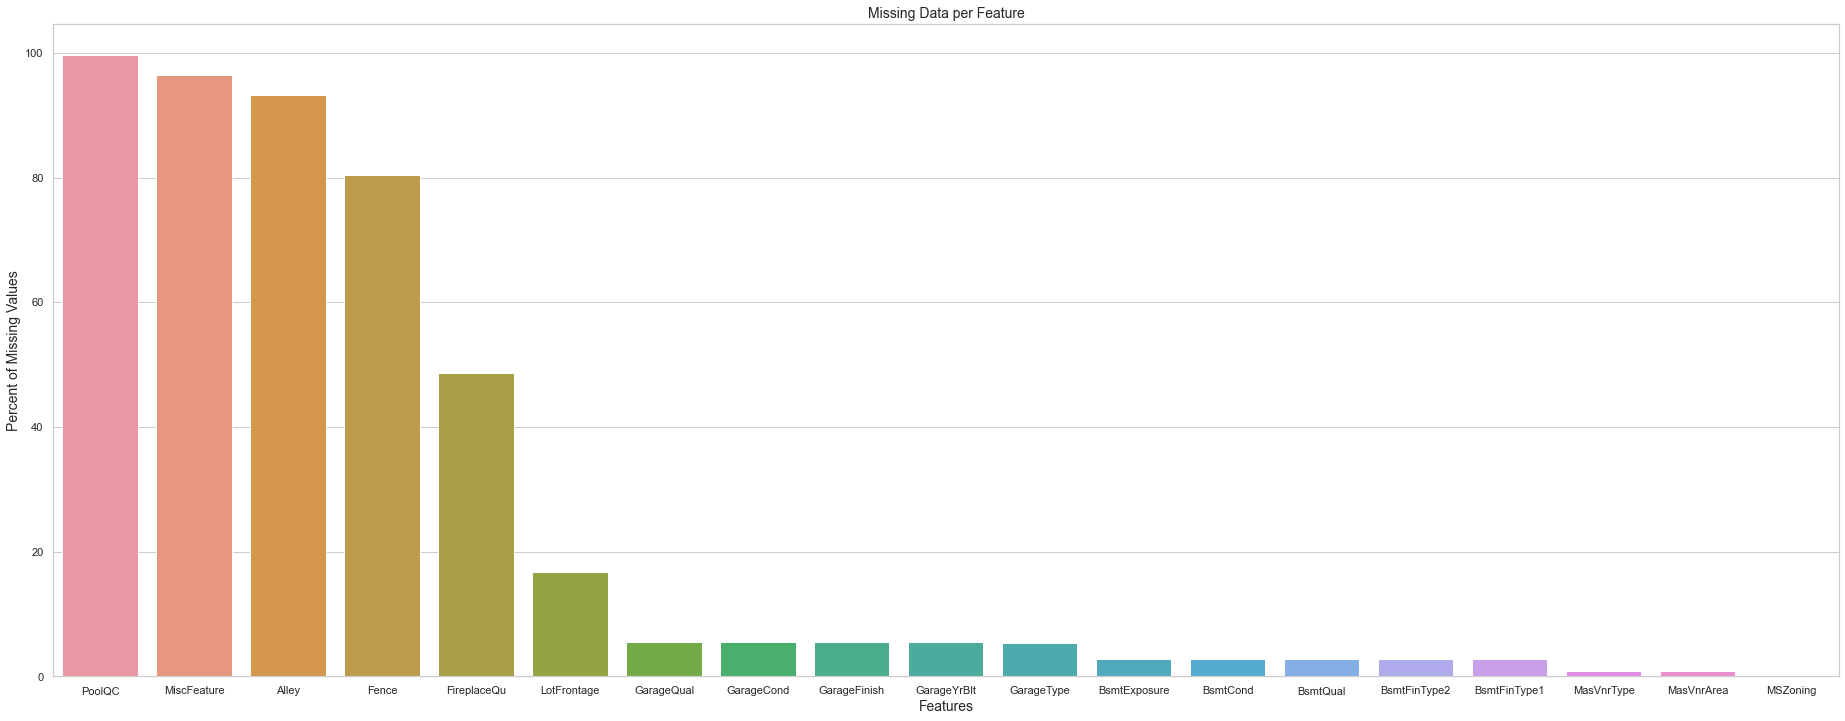

In [7]:
top_five_missing_df = missing_df[missing_df['missing_count'] > 3]

plt.figure(figsize=(32, 12))
sns.barplot(x=top_five_missing_df.index, y='missing_rate', data=top_five_missing_df)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percent of Missing Values', fontsize=14)
plt.title('Missing Data per Feature', fontsize=14)

In [8]:
missing_df

missing_count  missing_rate
PoolQC                 2909     99.657417
MiscFeature            2814     96.402878
Alley                  2721     93.216855
Fence                  2348     80.438506
FireplaceQu            1420     48.646797
LotFrontage             486     16.649538
GarageQual              159      5.447071
GarageCond              159      5.447071
GarageFinish            159      5.447071
GarageYrBlt             159      5.447071
GarageType              157      5.378554
BsmtExposure             82      2.809181
BsmtCond                 82      2.809181
BsmtQual                 81      2.774923
BsmtFinType2             80      2.740665
BsmtFinType1             79      2.706406
MasVnrType               24      0.822199
MasVnrArea               23      0.787941
MSZoning                  4      0.137033
BsmtFullBath              2      0.068517
BsmtHalfBath              2      0.068517
Utilities                 2      0.068517
Functional                2      0.068517
Electrical                1      0.034258
BsmtUnfSF                 1      0.034258
Exterior1st               1      0.034258
Exterior2nd               1      0.034258
TotalBsmtSF               1      0.034258
GarageCars                1      0.034258
BsmtFinSF2                1      0.034258
BsmtFinSF1                1      0.034258
KitchenQual               1      0.034258
SaleType                  1      0.034258
GarageArea                1      0.034258

There are **34** features that are affected by missing values. Let's review them:
* **FireplaceQu**, **Garage{X}**, **Alley**, **PoolQC**, **Bsmt{X}**, **MasVnr{X}**, **Fence** - we can assume that these features are not applicable to all samples that why they are missing. It's easy to imagine houses that don't have pools, basements or fireplaces.
* **MiscFeature** is also an optional feature that indicates additional benefits of the lot. It impacts the house sale price by **MiscVal** amount.
* **MSSubClass** - it's hard to assume about house sub class. It could be eigher missing value or untypical house building style. Let's stick with the first assumption
* **MSZoning**, **SaleType**, **Electrical**, **Utilities**, **Exterior{X}**, **KitchenQual** - we can assume these labels are missing
* **Functional** - dataset description suggests to assume missing information as typical

We may impute missing features by some constant value that indicates that feature is not part of a lot:

In [9]:
for feature in (
    'PoolQC', 
    'FireplaceQu', 
    'Alley', 
    'Fence', 
    'MiscFeature', 
    'BsmtQual', 
    'BsmtCond', 
    'BsmtExposure', 
    'BsmtFinType1', 
    'BsmtFinType2',
    'GarageType', 
    'GarageFinish', 
    'GarageQual', 
    'GarageCond',
    'BsmtQual', 
    'BsmtCond', 
    'BsmtExposure', 
    'BsmtFinType1', 
    'BsmtFinType2',
    'MasVnrType',
    'MSSubClass',
):
    train_df[feature] = train_df[feature].fillna('None')
    full_df[feature] = full_df[feature].fillna('None')

In [10]:
for feature in (
    'BsmtFinSF1', 
    'BsmtFinSF2', 
    'BsmtUnfSF',
    'TotalBsmtSF', 
    'BsmtFullBath', 
    'BsmtHalfBath',
    'MasVnrArea',
    'GarageCars',
    'GarageArea',
    'GarageYrBlt',
):
    train_df[feature] = train_df[feature].fillna(0)
    full_df[feature] = full_df[feature].fillna(0)

Features that we assumed missing, they can be impute by the most common values:

In [11]:
for feature in (
    'Electrical', 
    'KitchenQual', 
    'Exterior1st',
    'Exterior2nd', 
    'SaleType',
    'MSZoning',
    'Utilities',
):
    train_df[feature] = train_df[feature].fillna(train_df[feature].mode()[0])
    full_df[feature] = full_df[feature].fillna(full_df[feature].mode()[0])

In [12]:
train_df['Functional'] = train_df['Functional'].fillna('Typical')
full_df['Functional'] = full_df['Functional'].fillna('Typical')

In [13]:
from sklearn.preprocessing import LabelEncoder

enc_cat_features = []

for cat_feature in cat_features:
    train_df[cat_feature + 'Enc'] = LabelEncoder().fit_transform(train_df[cat_feature])
    full_df[cat_feature + 'Enc'] = LabelEncoder().fit_transform(full_df[cat_feature])
    enc_cat_features.append(cat_feature + 'Enc')

**LotFrontage** has ~17% of missing information. This feature may be helpful, so let's try to fill it. 

First, we need to understand what information we can use to impute **LotFrontage** (other words, what other features correlate with **LotFrontage**):

<AxesSubplot:xlabel='corralation', ylabel='feature'>

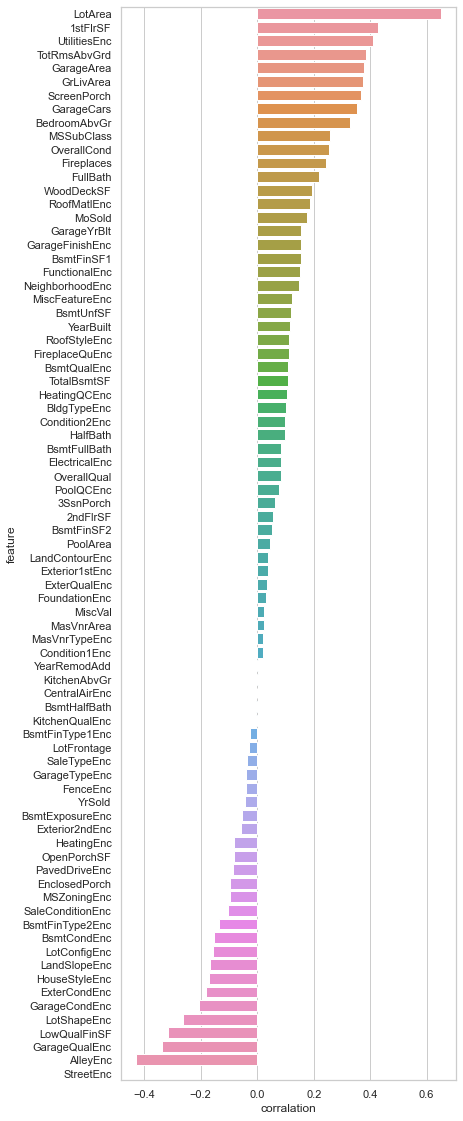

In [14]:
features = num_features + enc_cat_features + ['SalePrice']
features.remove('LotFrontage')

frontage_corr_df = pd.DataFrame()
frontage_corr_df['feature'] = num_features + enc_cat_features
frontage_corr_df['corralation'] = [train_df[feature].corr(train_df['LotFrontage'], 'spearman') for feature in features]
frontage_corr_df.sort_values('corralation', ascending=[0], inplace=True)

plt.figure(figsize=(6, 0.25 * len(features)))
sns.barplot(data=frontage_corr_df, y='feature', x='corralation', orient='h')

We can see that frontage depends on the general lot area and floor areas, house type and style, location itself, location conditions and land configurations. Also, features like garage, pool or porch can give us an idea how width frontage could be. 

So now let's train a regression model that will fill frontage for us:

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

def create_frontage_regressor():
    # params were found by SearchGridCV
    return RandomForestRegressor(
        max_depth=50,
        max_features=5,
        min_samples_leaf=2,
        min_samples_split=9,
        n_estimators=1100,
        random_state=42
    )

frontage_features = [
    'LotArea', 
    '1stFlrSF',
    '2ndFlrSF',
    'BldgTypeEnc',
    'MSSubClass', 
    'HouseStyleEnc',
    'NeighborhoodEnc',
    'GarageArea', 
    'AlleyEnc', 
    'LotConfigEnc', 
    'MSZoningEnc',
    'LotShapeEnc',
    'PoolArea',
    'LandContourEnc',
    'OpenPorchSF',
    'SaleConditionEnc',
    'Condition1Enc',
    'Condition2Enc',
]

frontage_train_df = full_df[full_df['LotFrontage'].notnull()]
frontage_features_df = frontage_train_df[frontage_features]
frontage_target_df = frontage_train_df['LotFrontage']

frontage_train_X, frontage_val_X, frontage_train_y, frontage_val_y = train_test_split(frontage_features_df, frontage_target_df, random_state=42)

# measure model performance on the training and validation sets
rf_frontage_regressor = create_frontage_regressor()
rf_frontage_regressor.fit(frontage_train_X, frontage_train_y)

frontage_train_predicted = rf_frontage_regressor.predict(frontage_train_X)
frontage_val_predicted = rf_frontage_regressor.predict(frontage_val_X)

print('Train MAE: %f' % mean_absolute_error(frontage_train_y, frontage_train_predicted))
print('Train R^2: %f' % r2_score(frontage_train_y, frontage_train_predicted))
print('Validation MAE: %f' % mean_absolute_error(frontage_val_y, frontage_val_predicted))
print('Validation R^2: %f' % r2_score(frontage_val_y, frontage_val_predicted))

# final train on whole dataset
rf_frontage_regressor = create_frontage_regressor()
rf_frontage_regressor.fit(frontage_features_df, frontage_target_df);

Train MAE: 5.388730
Train R^2: 0.830211
Validation MAE: 8.759542
Validation R^2: 0.580264


On average, our frontage regressor is wrong on about 7.96 $ft^2$ (~0.74 $m^2$). I don't believe that simpler assumption like imputing mean value for Neighborhood-HouseClass would work more precise. We can be very unfortunate to fill frontages for houses from groups with significant deviation (e.g. 15-20 $ft^2$ (1.4-1.9 $m^2$)):

In [16]:
frontage_train_df[['NeighborhoodEnc', 'MSSubClass', 'LotFrontage']].groupby(['NeighborhoodEnc', 'MSSubClass']).describe()

LotFrontage                                    \
                                 count       mean        std   min   25%   
NeighborhoodEnc MSSubClass                                                 
0               20                 3.0  49.666667   5.773503  43.0  48.0   
                120               17.0  46.411765   4.783550  43.0  43.0   
1               120                3.0  35.000000   0.000000  35.0  35.0   
                160                7.0  24.000000   0.000000  24.0  24.0   
2               160               30.0  21.500000   1.137147  21.0  21.0   
...                                ...        ...        ...   ...   ...   
23              80                 5.0  85.800000  22.521101  73.0  73.0   
                120                2.0  44.000000   2.828427  42.0  43.0   
24              20                 8.0  90.000000  13.596218  68.0  80.0   
                80                 3.0  86.666667  11.547005  80.0  80.0   
                120                5.0  34.400000  10.430724  22.0  30.0   

                                               
                             50%   75%    max  
NeighborhoodEnc MSSubClass                     
0               20          53.0  53.0   53.0  
                120         43.0  53.0   53.0  
1               120         35.0  35.0   35.0  
                160         24.0  24.0   24.0  
2               160         21.0  21.0   24.0  
...                          ...   ...    ...  
23              80          73.0  85.0  125.0  
                120         44.0  45.0   46.0  
24              20          92.0  97.0  110.0  
                80          80.0  90.0  100.0  
                120         32.0  38.0   50.0  

[156 rows x 8 columns]

Finally, let's impute **LotFrontage** feature:

In [17]:
train_df.loc[train_df['LotFrontage'].isnull(), 'LotFrontage'] = rf_frontage_regressor.predict(
    train_df[train_df['LotFrontage'].isnull()][frontage_features]
)

full_df.loc[full_df['LotFrontage'].isnull(), 'LotFrontage'] = rf_frontage_regressor.predict(
    full_df[full_df['LotFrontage'].isnull()][frontage_features]
)

## House Properties and SalePrice Relations

### 1.2.1 Sale Price Distribution

First things goes first. Let's see SalePrice distribution shape:

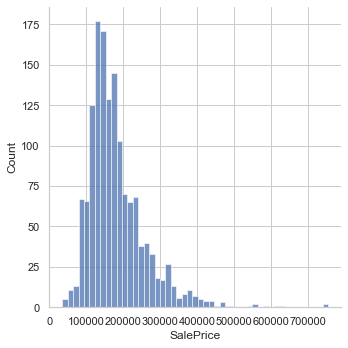

In [23]:
sns.displot(full_df['SalePrice'])

In [24]:
print('Skewness: %f' % train_df['SalePrice'].skew())
print('Kurtosis: %f' % train_df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


SalePrice distribution resembles a normal distribution that skewed to the right.

We may want to `apply log scaling` to normalize the SalePrice shape, because ML algorithms performs better on the normally distributed features.

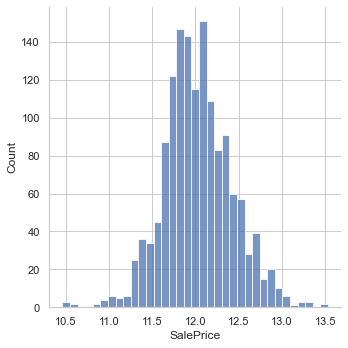

In [25]:
sns.displot(np.log(full_df['SalePrice']))

What about SalePrice central tendency?

In [26]:
fullDf['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The `75%` of houses have price `$214k` and less. 25%, 50% and 75% may define a price tiers for us to simplify understand of the catgorical data. With this in mind, let's add a new column `SalePriceGroup` with three tiers:
* Cheap Groups:
    * `Less than 25%` houses (<= $129k)
    * Houses from `25% - 50%` range (>\$129k and <=\$163k)
* Expensive Groups:
    * Houses from `50%-75%` range (>\$163k and <=\$214k)
    * `75% and more` 

In [27]:
def imputeSalePriceGroup(salePrice):
    if salePrice <= 129975:
        return '25% and less'
    if salePrice > 129975 and salePrice <= 163000:
        return '25% - 50%'
    if salePrice > 163000 and salePrice < 214000:
        return '50% - 75%'
    if salePrice >= 214000:
        return '75% and more'

full_df['SalePriceGroup'] = full_df['SalePrice'].apply(imputeSalePriceGroup)

It's useful to see a correlations between numerical features before we take a deeper look at each feature:

#### 1.3.2 Room Number, Lot and Living Areas, Floor Areas

`Living Area` is suppose to impact `SalePrice`:

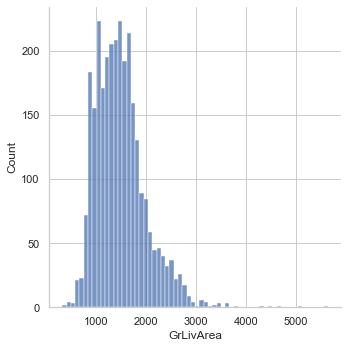

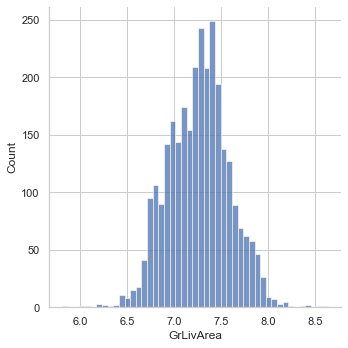

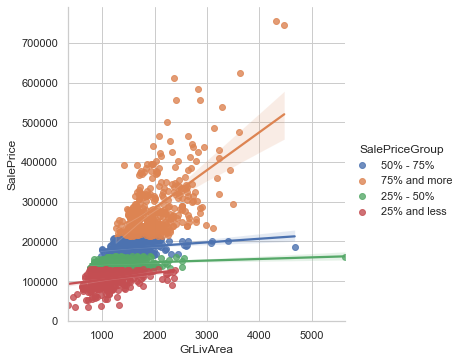

In [28]:
sns.displot(data=full_df['GrLivArea'])
sns.displot(data=np.log(full_df['GrLivArea']))
sns.lmplot(data=full_df, x='GrLivArea', y='SalePrice', hue='SalePriceGroup')

We see a linear correlation and raising the SalePrice as the living area goes up/right.

There are two outliers. Their area more than 4,000 $ft^2$ but the sale prices are below than an average. Let's remove them from the dataset:

In [29]:
full_df.drop(
    full_df[(full_df['GrLivArea'] > 4000) & (full_df['SalePrice'] < 700000)].index,
    inplace=True
)

Next feature is Total Room Number. 

Total Room Number is connected to Living Area (correlation - `0.81`). The more living area, the more rooms normally present.

Room number seems to correlate with SalePrice as well (correlation - `0.54`). Namely, >75% tier have a good correlation with room number. We don't see the same for the rest of tiers.

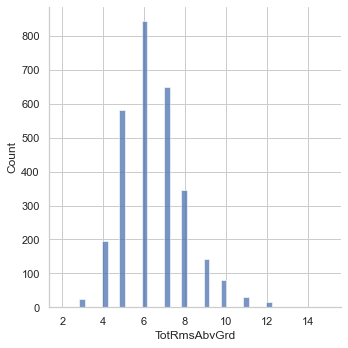

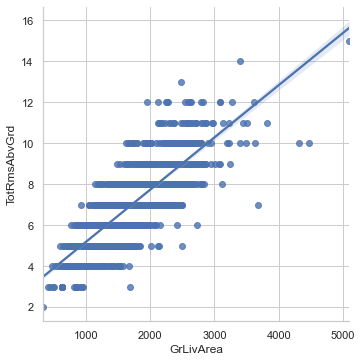

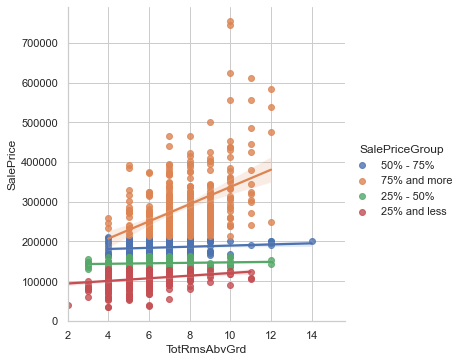

In [30]:
sns.displot(data=full_df['TotRmsAbvGrd'])
sns.lmplot(data=full_df, x='GrLivArea', y='TotRmsAbvGrd')
sns.lmplot(data=full_df, x='TotRmsAbvGrd', y='SalePrice', hue='SalePriceGroup')

Most of the lot areas are less than 50000 $ft^2$. Probably, there might be some building standards that keep lot areas inside of the range.

That's why Lot Area just slightly correlates with SalPrice (correlation - `0.21`).

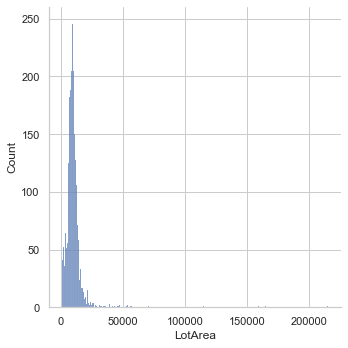

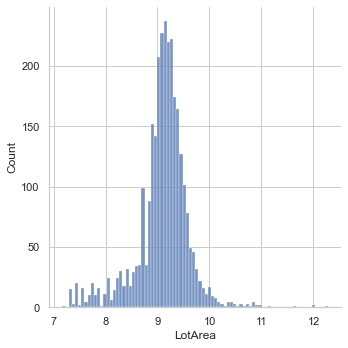

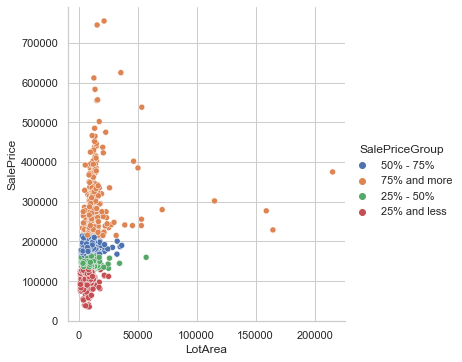

In [31]:
sns.displot(data=full_df['LotArea'])
sns.displot(data=np.log(full_df['LotArea']))
sns.relplot(data=full_df, x='LotArea', y='SalePrice', hue='SalePriceGroup')

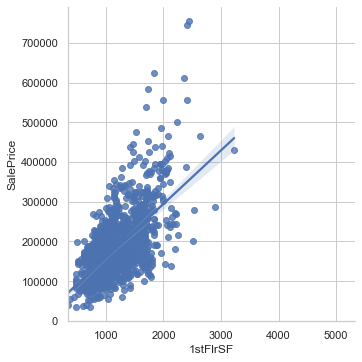

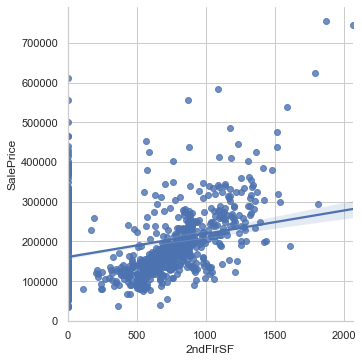

In [32]:
sns.lmplot(data=full_df, x='1stFlrSF', y='SalePrice')
sns.lmplot(data=full_df, x='2ndFlrSF', y='SalePrice')

Floor areas correlates with SalePrice. Namely, SalePrice seems to be linearly dependent on 1st floor area.

If we summ 1st and 2nd floar areas, we will get the `living area` feature.

#### 1.3.4 House Types and Styles

Dataset contains three features related to house building style.

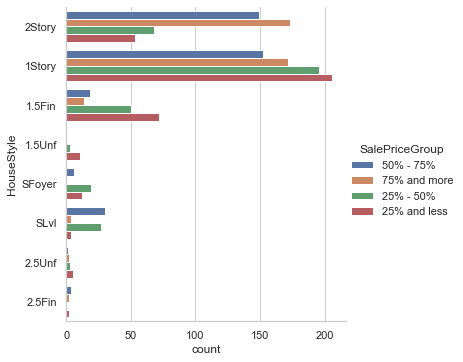

In [33]:
# House Styles correlate with sale prices
# House prices > 75% perc: 2Story, 1Story 1.5Fin
# House prices > 50% and > 75% perc: 2Story, 1Story, SLvl, 2.5Fin
# House prices < 25% and > 50% perc: 1Story, 2Story, 1.5Fin, SLvl, 2.5Unf, 1.5Unf
# House prices < 25% perc: 1.5Fin, 1.5Unf, 2.5Unf

sns.catplot(data=full_df, y='HouseStyle', hue='SalePriceGroup', kind='count')

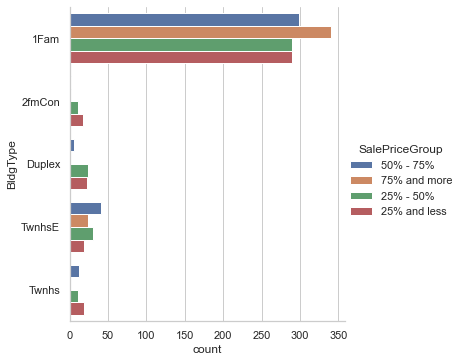

In [34]:
# Dwelling Type correlates house sale price
## House prices > 75% perc: 1Fam, TwnhsE
## House prices > 50% and < 75% perc: 1Fam, TwnhsE, TwnhsI
## House prices > 25% and < 50% perc: 1Fam, 2FamCon, TwnhsE, TwnhsI, Duplex
## House prices < 25% perc: 1Fam, 2fmCon, TwnhsE, TwnhsI, Duplex

sns.catplot(data=full_df, y='BldgType', hue='SalePriceGroup', kind='count')

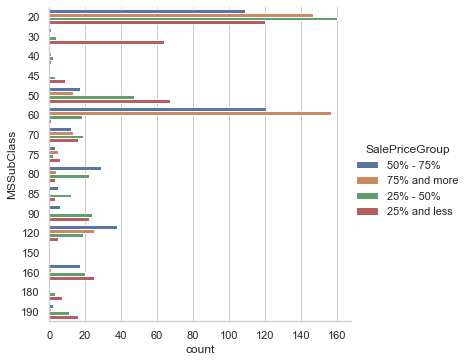

In [35]:
# MSSubClass type of dwelling is a helpful differentiator of the sale price
## House prices > 75% perc: 20, 60, 70, 75, 80, 120 (1 and 2 story of 1946 and newer)
## House prices > 50% and < 75% perc: 20, 60, 80, 120, 160 (diff styles of newer types)
## House prices > 25% and < 50% perc: 20, 30, 40, 45, 50, 60, 70, 80, 85, 90, 120, 160, 190
## House prices < 25% perc: 20, 30, 45, 50, 70, 75, 90, 120, 160, 190 (Older and unfinished styles)

sns.catplot(data=full_df, y='MSSubClass', hue='SalePriceGroup', kind='count')

LotShape and LotConfig

<AxesSubplot:xlabel='count', ylabel='LotConfig'>

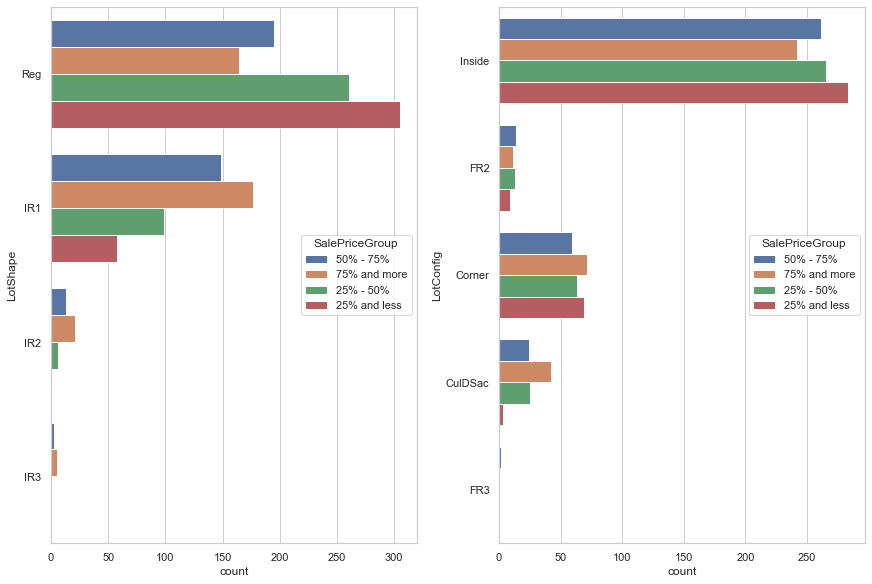

In [36]:
# Houses with SalePrice > 75% percentile dominate among houses with irregular shape.
# Most of the Houses with SalePrice < 25% have a regular shape tho.

# Lot configuration: 
## Houses with SalePrice > 75% percentile have Corner, Inside, FR2, CulDSac types
## Houses with SalePrice < 25% have mostly inside types and also Corner and FR2 types
# More info: https://www.thetruthaboutrealty.com/real-estate-lot-types/

fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=full_df, y='LotShape', hue='SalePriceGroup', ax=ax[0])
sns.countplot(data=full_df, y='LotConfig', hue='SalePriceGroup', ax=ax[1])

`Frontage` is width of a lot, measured at the front part of the lot. `Footage` correlates with `LotArea`.

More Info: https://www.gimme-shelter.com/frontage-50043/

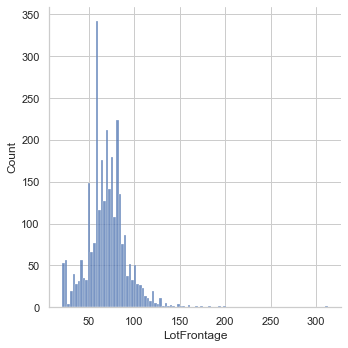

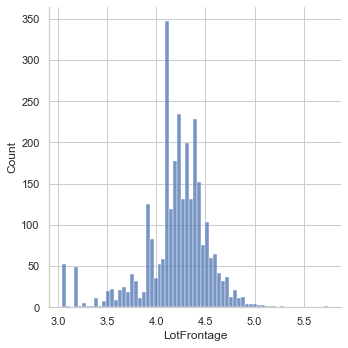

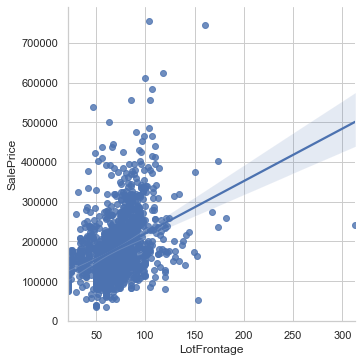

In [37]:
# How to impute missing data if we want to use it?
sns.displot(full_df['LotFrontage'])
sns.displot(np.log(full_df['LotFrontage']))
sns.lmplot(data=full_df, x='LotFrontage', y='SalePrice')

In [38]:
train_df[train_df['LotFrontage'].notnull()]['LotFrontage'].describe()

count    1460.000000
mean       70.668623
std        23.326946
min        21.000000
25%        60.000000
50%        70.000000
75%        81.022161
max       313.000000
Name: LotFrontage, dtype: float64

~16% of footage information is missing in the dataset. If we decide to use frontage in the modeling, we will need to came up with imputing stategy.

The simples way is to impute mean frontage based on `Neighborhood` and `MSSubClass`. 
A harder way way would be leverage knowledge that the frontage depends on `LotArea`, `1stFloorArea`, `Neighborhood` and `MSSubClass` and train a linear regression model to impute the information. We should have enough trainging data for this (96% of frontage records are in place).

#### LandContour and LandSlope

<AxesSubplot:xlabel='count', ylabel='LandSlope'>

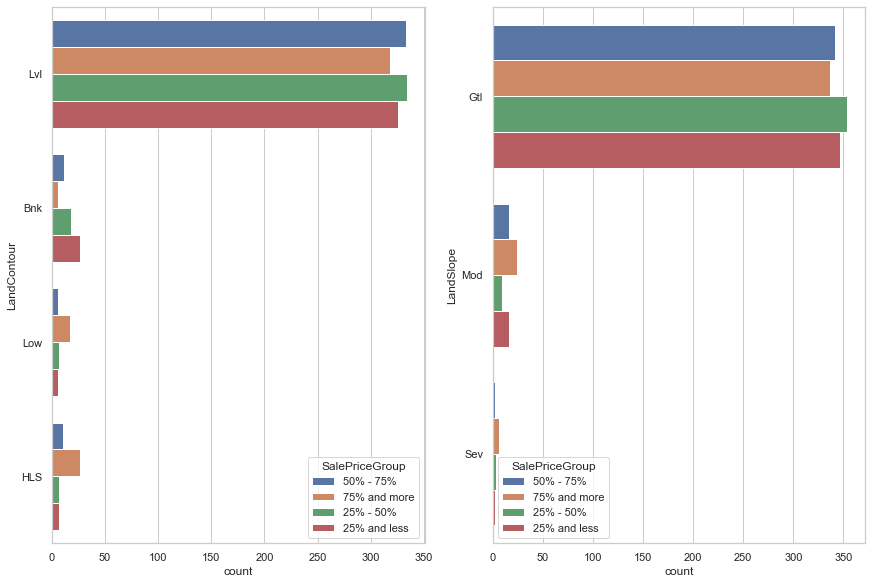

In [39]:
# Land Contour
## Low and hillside flatness as well as moderate and severe slopes dominate among house with SalePrice > 75% percentile. Probably, these houses have some kind of landscape design work done

fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=full_df, y='LandContour', hue='SalePriceGroup', ax=ax[0])
sns.countplot(data=full_df, y='LandSlope', hue='SalePriceGroup', ax=ax[1])

#### Foundation and Basement

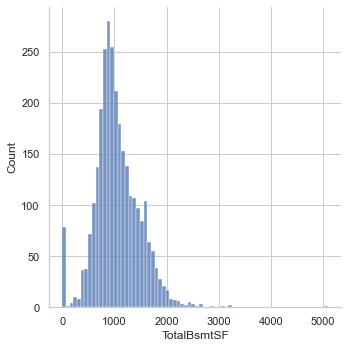

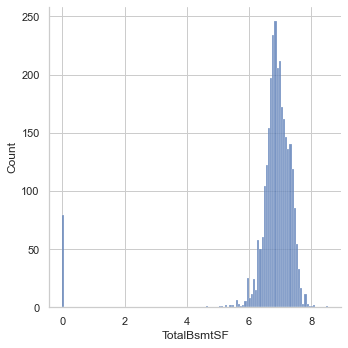

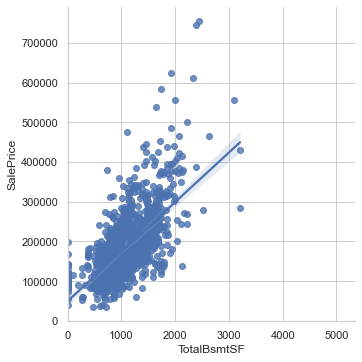

In [40]:
sns.displot(full_df['TotalBsmtSF'])
sns.displot(np.log1p(full_df['TotalBsmtSF']))
sns.lmplot(data=full_df, x='TotalBsmtSF', y='SalePrice')

While basement area is not that attractive as above ground one, it still strongly correlates with SalePrice.

Basement Quality and Condition should help us to calibrate a part of SalePrice that the basement brings:

<AxesSubplot:xlabel='count', ylabel='BsmtCond'>

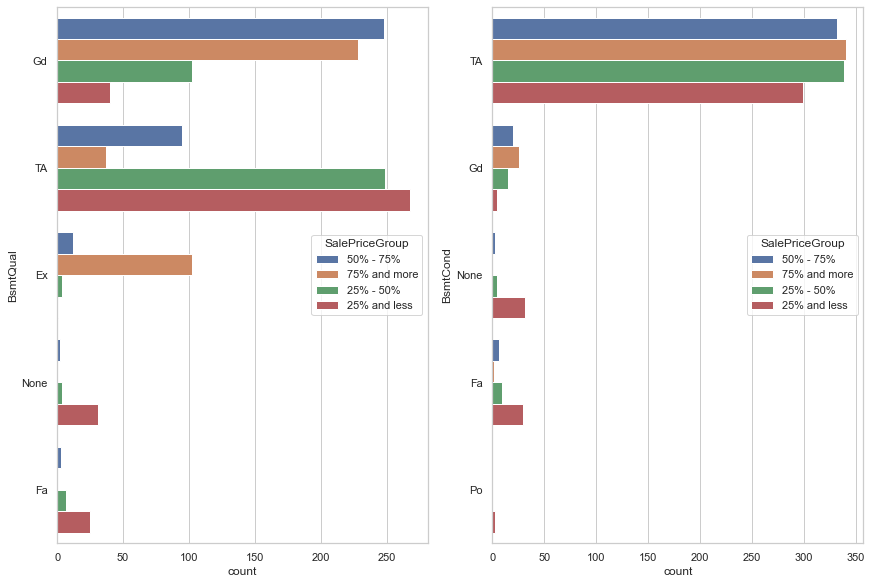

In [41]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=full_df, y='BsmtQual', hue='SalePriceGroup', ax=ax[0])
sns.countplot(data=full_df, y='BsmtCond', hue='SalePriceGroup', ax=ax[1])

Basement Quality and Condition show a typical situation: >50% tier has basements with above average conditions and built from quality materials.


Another metric is whenever basement is finished or not:

<AxesSubplot:xlabel='count', ylabel='BsmtFinType2'>

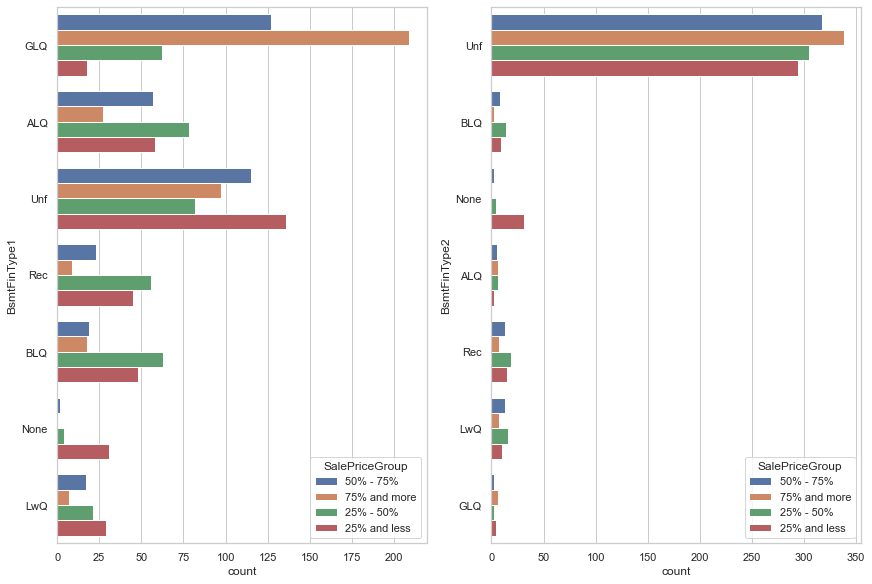

In [42]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=fullDf, y="BsmtFinType1", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="BsmtFinType2", hue="SalePriceGroup", ax=ax[1])

Basement may be finished in different ways. It can be turned into recreation, living quarters or bathrooms:

More Info: https://www.cidbasements.com/qualifies-finished-basement#:~:text=A%20basement%20is%20finished%20when,level%20ceilings%2C%20and%20finished%20walls.

<AxesSubplot:xlabel='count', ylabel='BsmtHalfBath'>

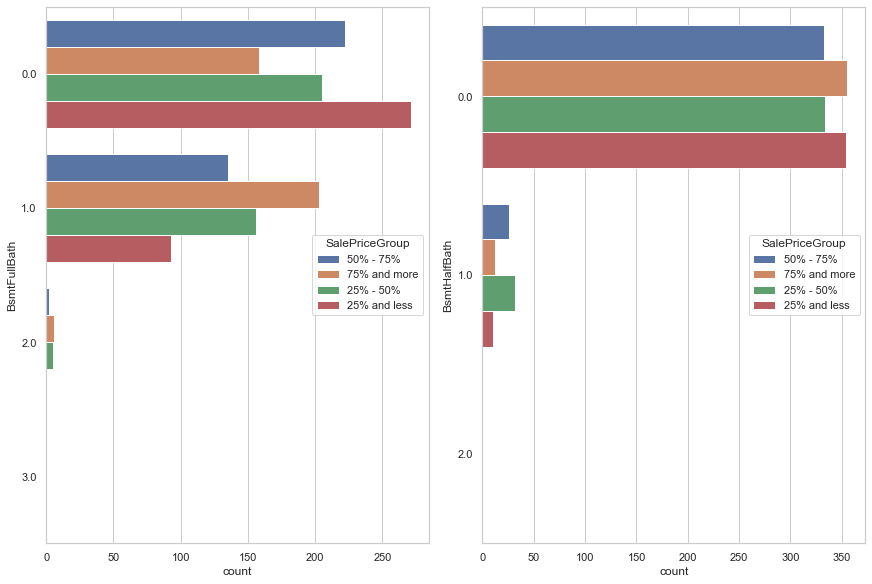

In [43]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=full_df, y='BsmtFullBath', hue='SalePriceGroup', ax=ax[0])
sns.countplot(data=full_df, y='BsmtHalfBath', hue='SalePriceGroup', ax=ax[1])

Big part of houses don't have bathrooms in the basement. Half bathrooms in the basement is rare and some houses actully have full bathrooms in the basement.

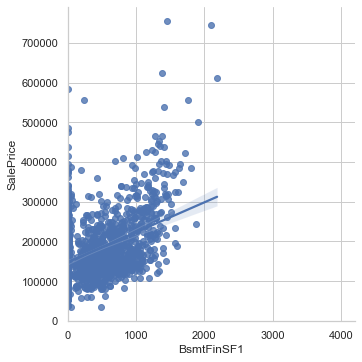

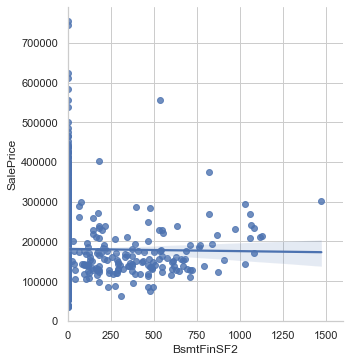

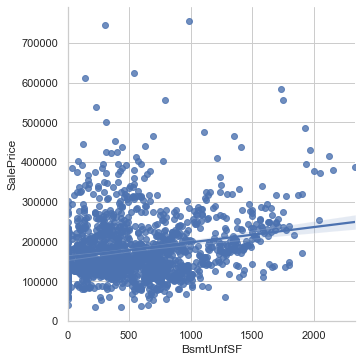

In [44]:
sns.lmplot(data=full_df, x='BsmtFinSF1', y='SalePrice')
sns.lmplot(data=full_df, x='BsmtFinSF2', y='SalePrice')
sns.lmplot(data=full_df, x='BsmtUnfSF',  y='SalePrice')

Essentially, **TotalBsmtSF** is a sum of **BsmtFinSF1**, **BsmtFinSF2** and **BsmtUnfSF**. 

All missing information in these fields we can impute with zeroes. Most likely, missing information in basement areas mean that a lot doesn't have basement.

<AxesSubplot:xlabel='count', ylabel='BsmtExposure'>

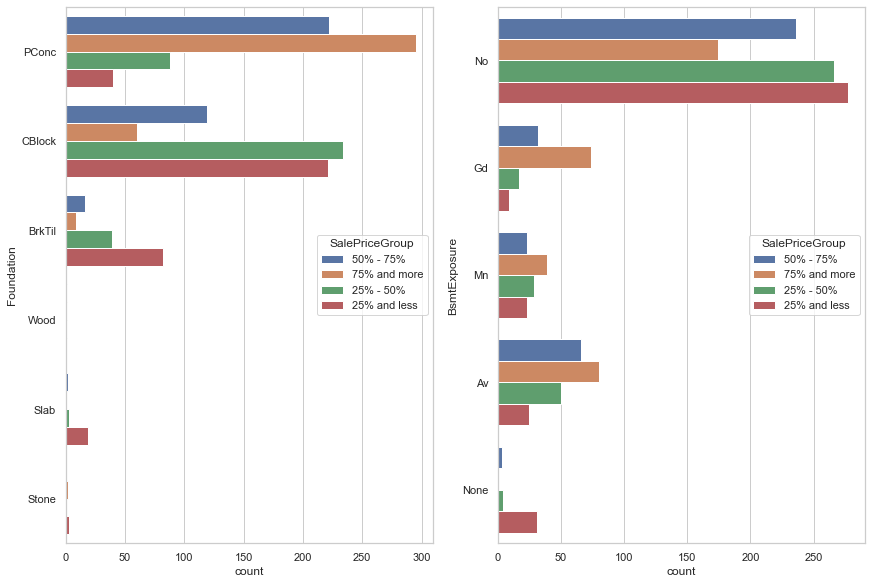

In [45]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=full_df, y='Foundation', hue='SalePriceGroup', ax=ax[0])
sns.countplot(data=full_df, y='BsmtExposure', hue='SalePriceGroup', ax=ax[1])

Poured Contrete foundation is popular in >50% tier. It seems to be a modern way to found houses. The rest of types may be just old fashion.

#### House Overall Condition and Material Quality

<AxesSubplot:xlabel='count', ylabel='OverallQual'>

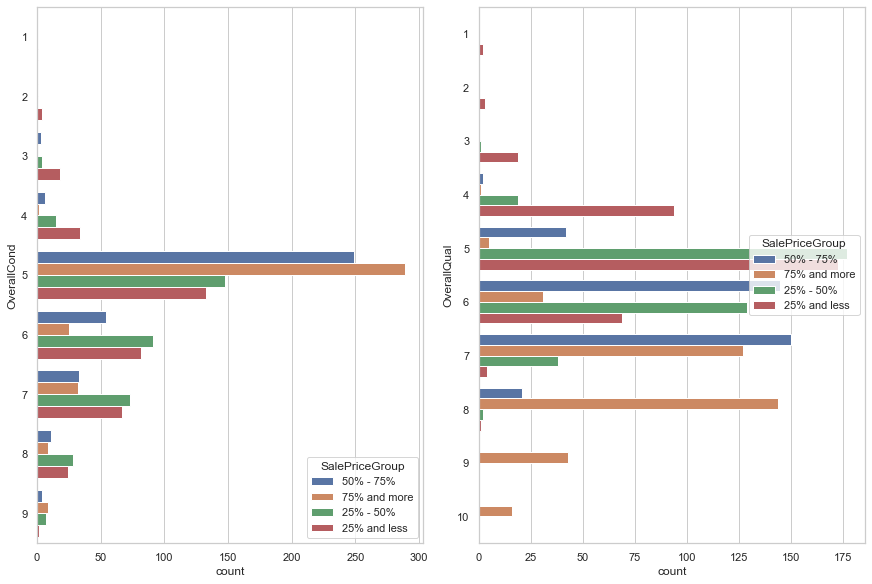

In [46]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=full_df, y='OverallCond', hue='SalePriceGroup', ax=ax[0])
sns.countplot(data=full_df, y='OverallQual', hue='SalePriceGroup', ax=ax[1])

Overall Condition and Material Quality strongly correlates with SalePrices.

Houses with SalePrice > 50% percentile have average and higher overall condition. Lots with SalePrice < 50% tier have a higher percentage among below average condition houses, but generally they are included to all condition groups.

Overall Material Quality seems to differentiate expensive houses from cheap ones. Lots with SalePrice < 50% tier dominates in average and below quality groups. In above average quality groups, there are a bigger percentage of houses with SalePrice > 50% tier (particularly, lots with SalePrice > 75% tier prevail in "very good" and above quality groups).

<AxesSubplot:xlabel='count', ylabel='Functional'>

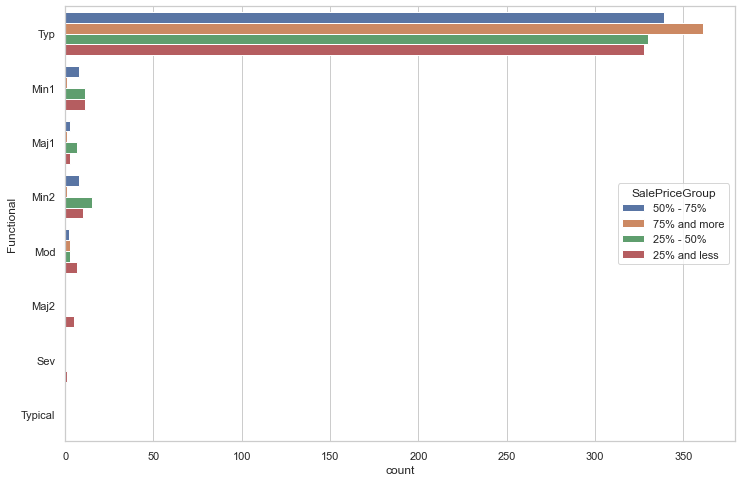

In [47]:
# Home functionality affects house sale price. 
sns.countplot(data=full_df, y='Functional', hue='SalePriceGroup')

Samples with a functionality other than "Typical" losses sale prices drastically.

#### Year Built and Renovate

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

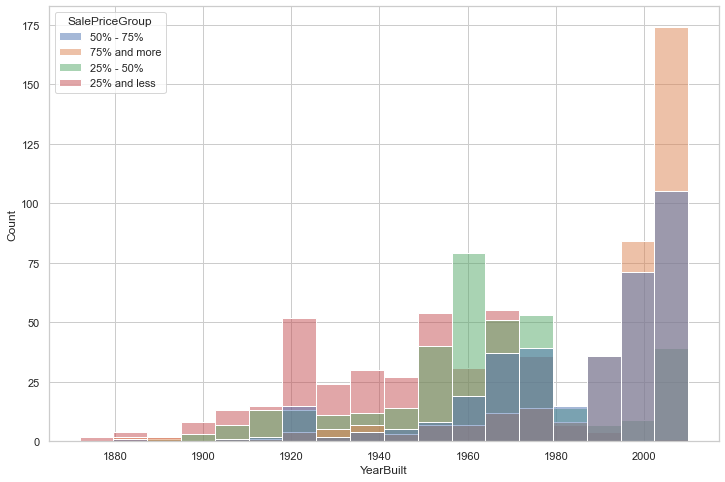

In [48]:
# YearBuilt impacts SalePrice. Most of the cheap houses (<50% percentile) are built in between of 1880 and 1970
# Expensive houses (>50%) have been built recently

sns.histplot(data=full_df, x='YearBuilt', hue='SalePriceGroup')

#### House Access

<AxesSubplot:xlabel='count', ylabel='Street'>

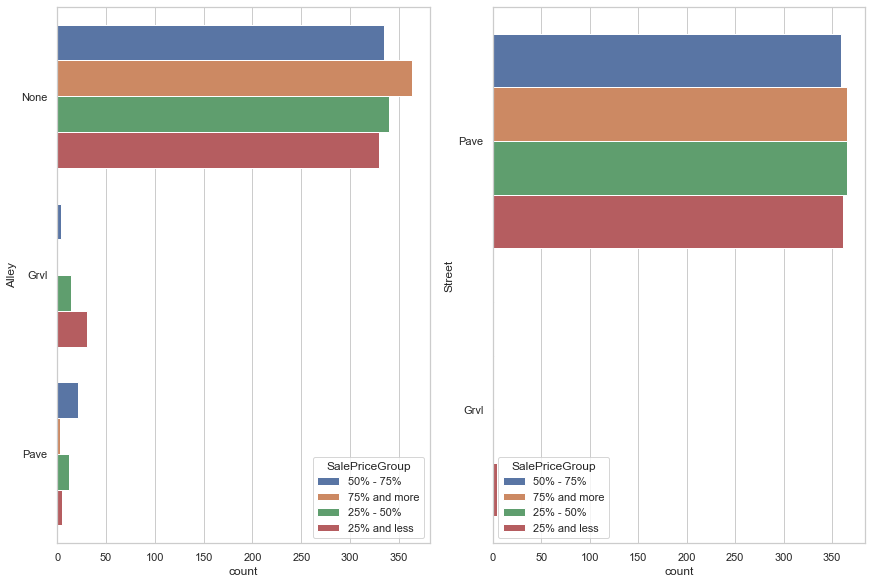

In [74]:
# Most of houses that have SalePrice < 50% connected with gravel alleys or gravel streets.

fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=full_df, y='Alley', hue='SalePriceGroup', ax=ax[0])
sns.countplot(data=full_df, y='Street', hue='SalePriceGroup', ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='PavedDrive'>

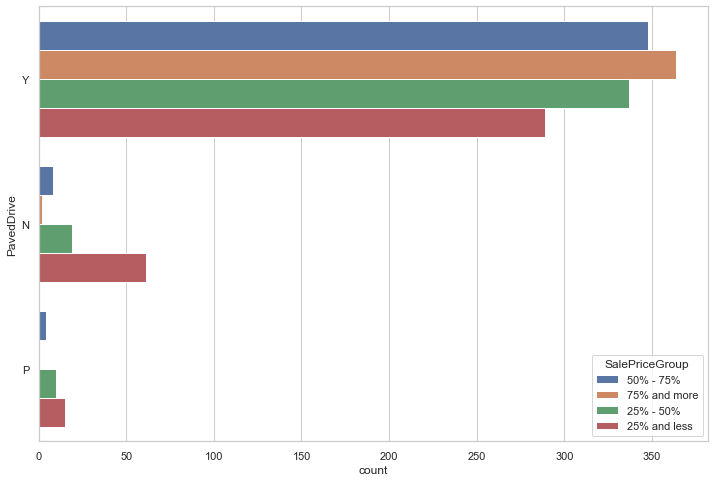

In [50]:
# Conclusions?

sns.countplot(data=full_df, y='PavedDrive', hue='SalePriceGroup')

House Location: Neighborhood, Zoning and Additional Conditions

<AxesSubplot:xlabel='count', ylabel='MSZoning'>

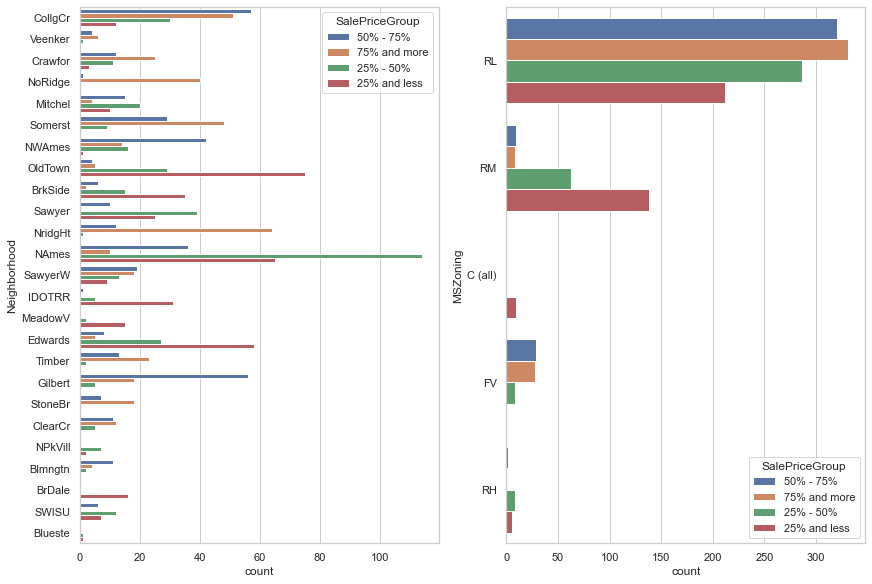

In [51]:
# Neighborhood and MSZoning do differentiate dataset:

# Zoning with house price above the mean: RL, FV
# Zoning with house price below the mean: RM, C, RH

# Neighborhoods with house price below the mean: IDOTRR, Swisu, DrDale, NPkVill, MeadowV, Sawyer, OldTown, Edwards, NAmes
# Neighborhoods with house price above the mean: NoRidge, Mitchel, Crawfor, SawyerW, Timber, Somerst, CollgeCr, Gilbert, NWAmes
# Neighborhoods with house price above 75% perct: NridgHt, CollgeCr, Crawfor, Timber, StoreBr

#https://www.investopedia.com/terms/z/zoning.asp#:~:text=Zoning%20allows%20local%20governments%20to,among%20other%20more%20specific%20designations.

fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="Neighborhood", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="MSZoning", hue="SalePriceGroup", ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='Condition2'>

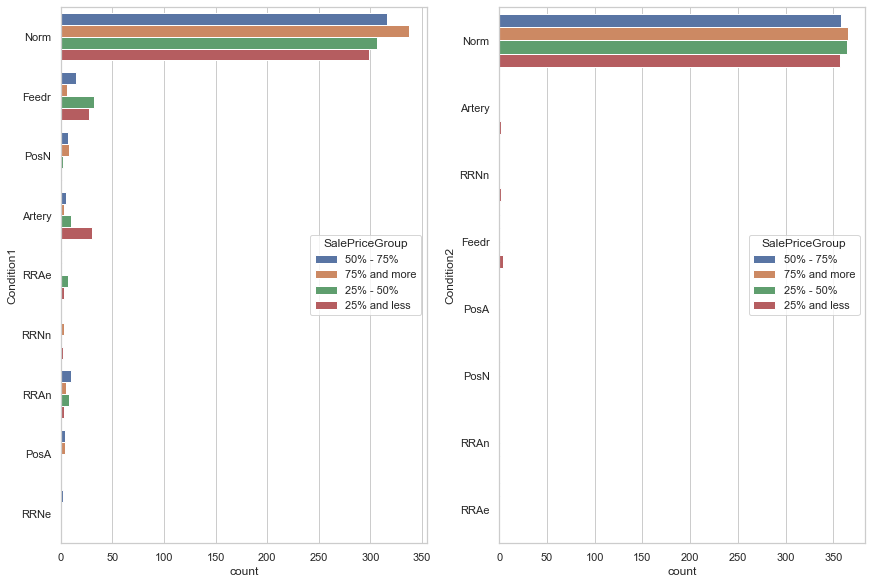

In [52]:
# ?
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="Condition1", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="Condition2", hue="SalePriceGroup", ax=ax[1])

#### Roof Properties

<AxesSubplot:xlabel='count', ylabel='RoofMatl'>

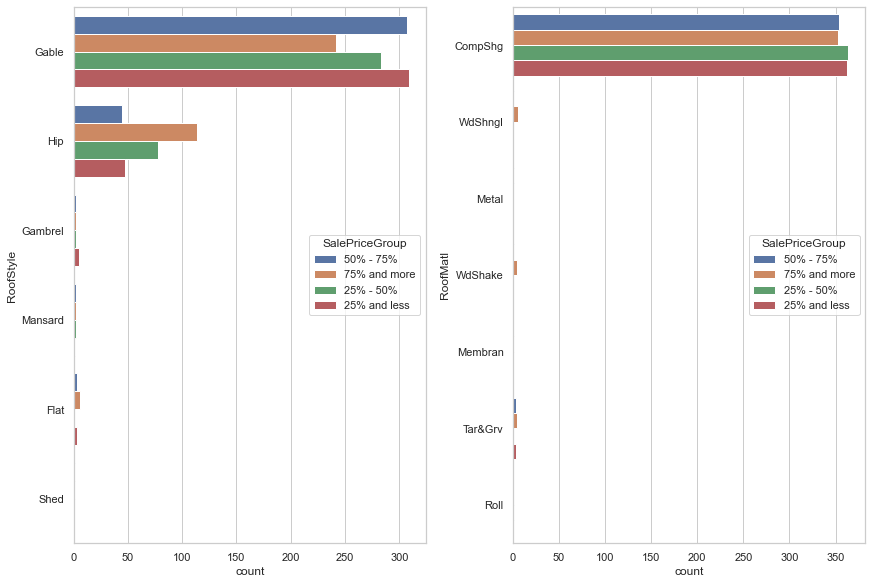

In [53]:
# ?
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="RoofStyle", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="RoofMatl", hue="SalePriceGroup", ax=ax[1])

House Exterior Properties

<AxesSubplot:xlabel='count', ylabel='Exterior2nd'>

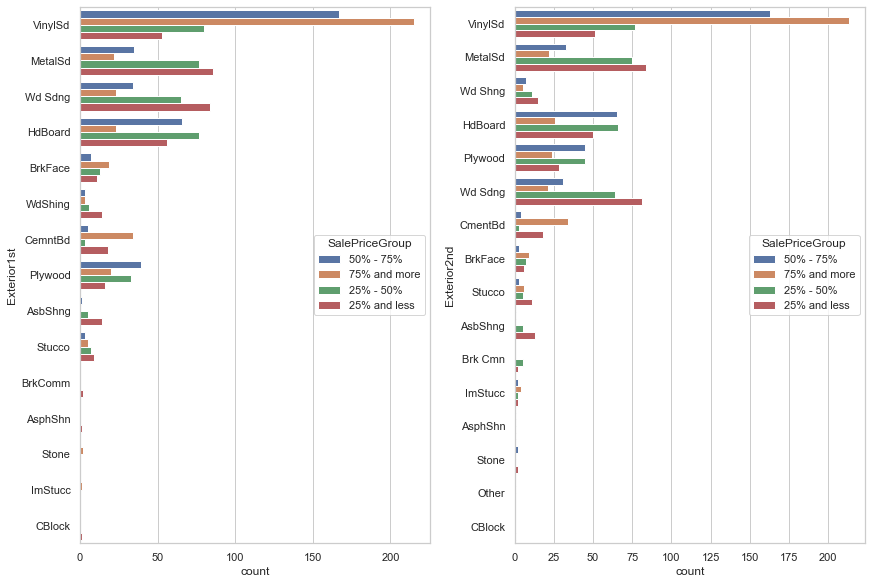

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="Exterior1st", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="Exterior2nd", hue="SalePriceGroup", ax=ax[1])

#### Masonry Veneer

<AxesSubplot:xlabel='count', ylabel='MasVnrType'>

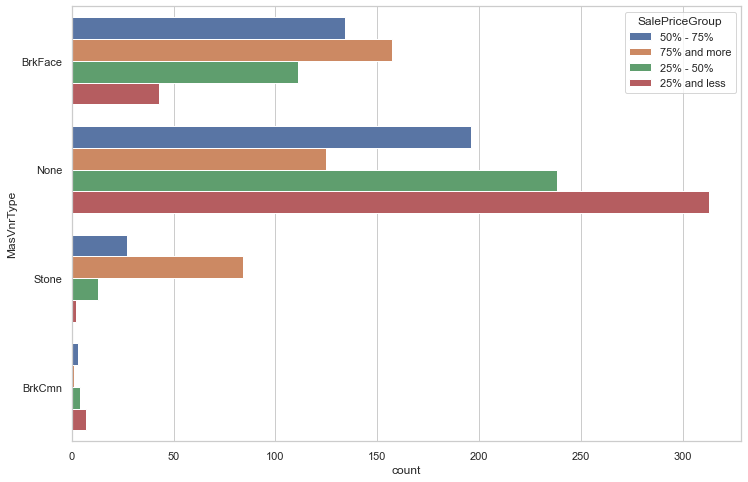

In [55]:
# ?
sns.countplot(data=fullDf, y="MasVnrType", hue="SalePriceGroup")

<AxesSubplot:xlabel='count', ylabel='ExterCond'>

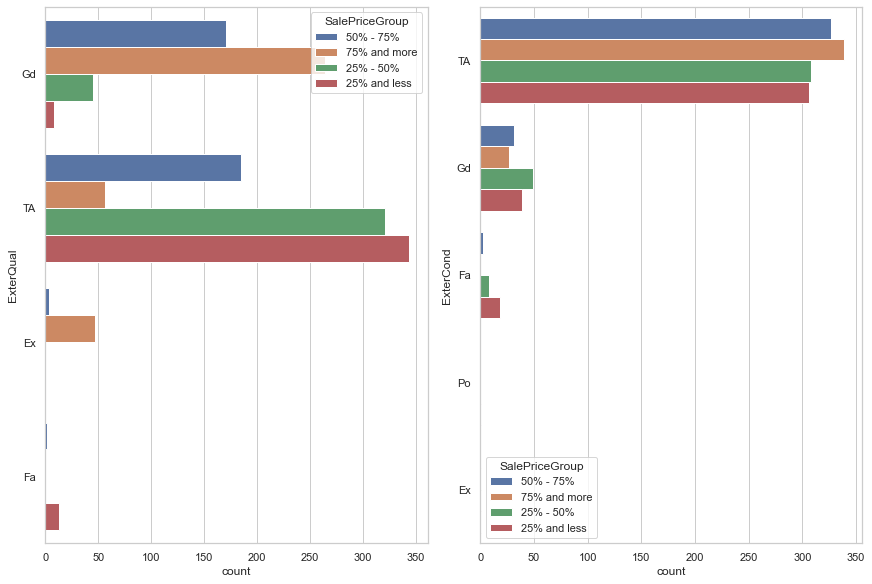

In [56]:
# Houses with SalePrice > 75% percentile have mostly good or excellent exterior quality. They also have average or good conditions.

## Houses with SalePrice < 50% percentile have mostly average quality and average condition.

fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=fullDf, y="ExterQual", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="ExterCond", hue="SalePriceGroup", ax=ax[1])

Heating, Air Condition and Electrical Systems, Utilities

<AxesSubplot:xlabel='count', ylabel='HeatingQC'>

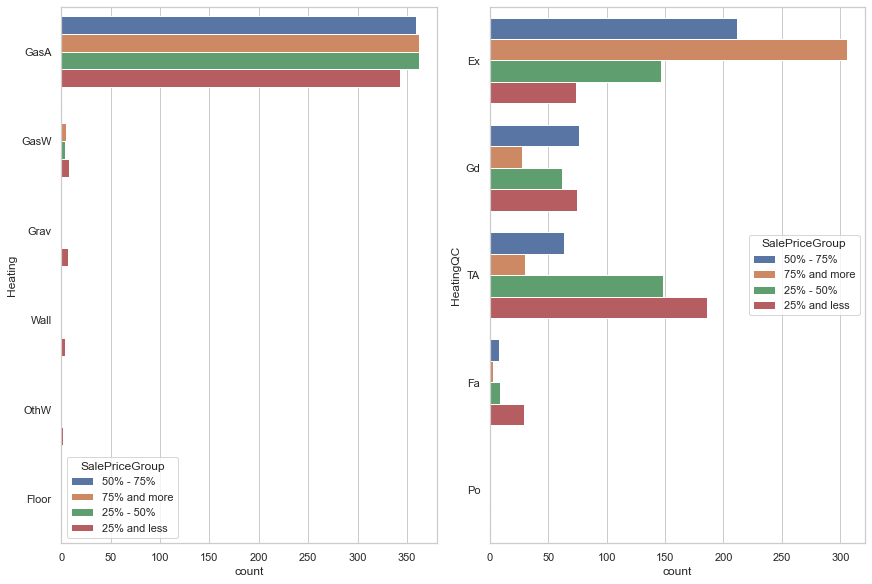

In [57]:
# Heating Types does differentiate samples with sale price below the mean
# Namely, wall, gravity, floor furneses and other heating were installed in houses that cheaper than the mean

# It seems like the mentioned heating systems are old fashion. Here is the YearBuilt ranges:
# Grav - 1910-1941
# Floor - 1949
# OthW - 1872-1917
# Wall - 1945-1952

# GasW - 1880-1970
# GasA - 1875-2010

## Most houses with SalePrice > 50% have from excellent to average quality of heating. Lower quality types includes mostly houses from < 50% percentile.

fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=fullDf, y="Heating", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="HeatingQC", hue="SalePriceGroup", ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='Electrical'>

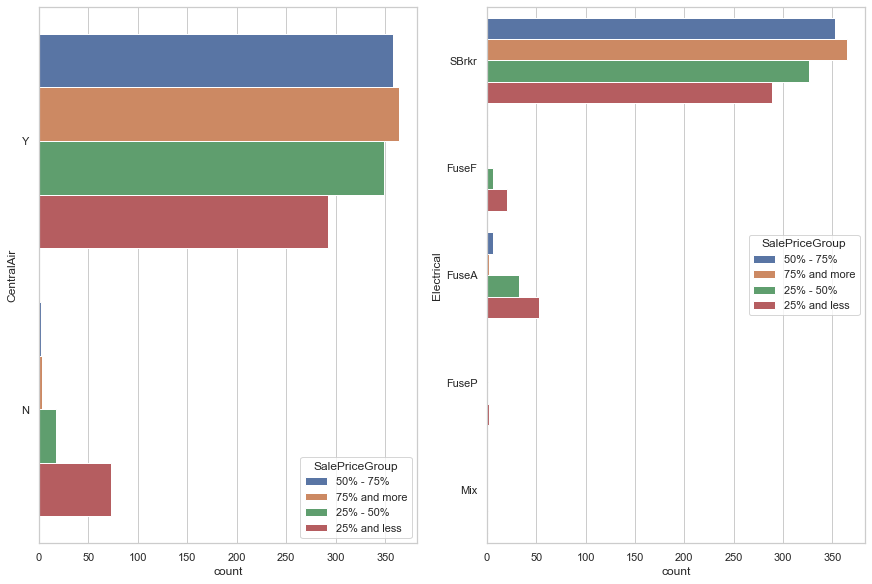

In [58]:
# Central AC seems to be an popular option in the dataset. Most of the houses from >50% percentile have it. 
# Central AC is not installed in cheap (<25% percentile) houses.
## More Info: https://www.thisoldhouse.com/heating-cooling/21018992/read-this-before-you-install-central-air-conditioning

# Most of the houses have "Standard Circuit Breakers & Romex" type of electricity. Houses from >50% dominates there. The rest of options are hold by <50% houses. They seem to be in the worst conditions.

fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="CentralAir", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="Electrical", hue="SalePriceGroup", ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='Utilities'>

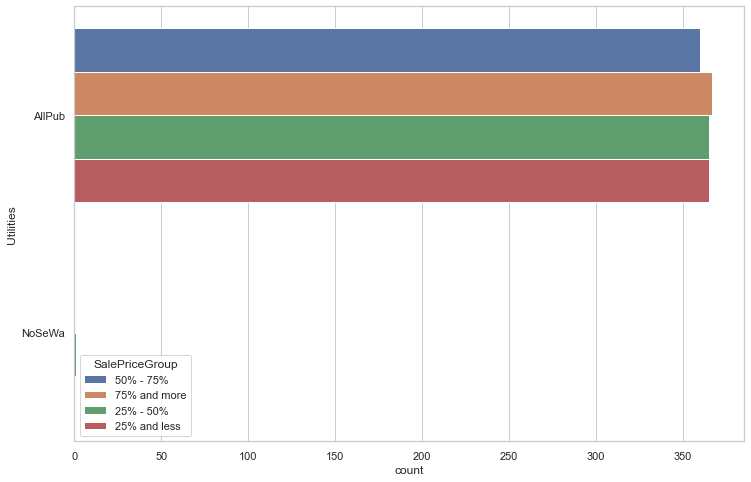

In [59]:
# Utilities feature has only one value in the dataset

sns.countplot(data=fullDf, y="Utilities", hue="SalePriceGroup")

In [60]:
fullDf[fullDf['Utilities'] != 'AllPub']

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
944      1344         0          0  None             3     1Fam       TA   

    BsmtExposure  BsmtFinSF1  BsmtFinSF2  ... NeighborhoodEnc PavedDriveEnc  \
944           No       111.0       354.0  ...              23             2   

     PoolQCEnc  RoofMatlEnc RoofStyleEnc  SaleConditionEnc SaleTypeEnc  \
944          3            1            1                 0           0   

    StreetEnc UtilitiesEnc SalePriceGroup  
944         1            1      25% - 50%  

[1 rows x 125 columns]

Kitchen Properties

<AxesSubplot:xlabel='count', ylabel='KitchenAbvGr'>

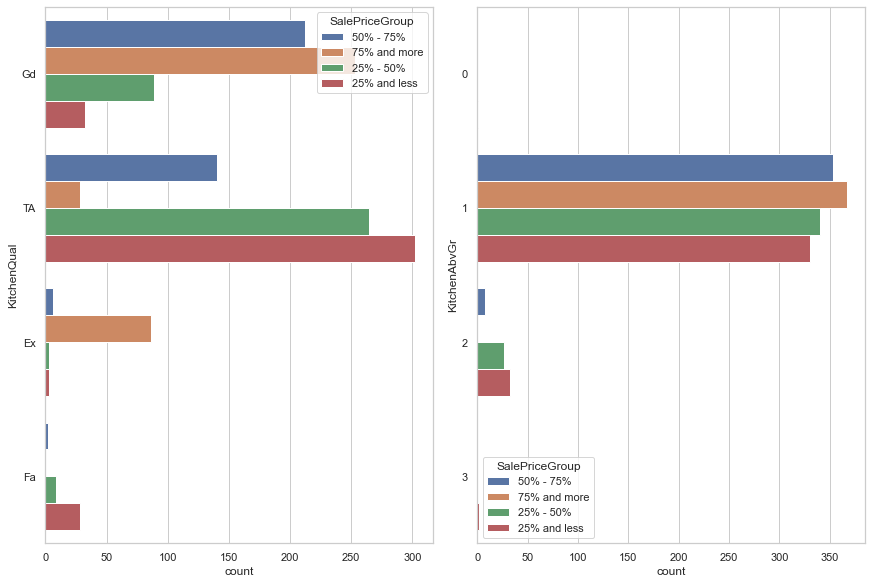

In [61]:
# ?
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="KitchenQual", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="KitchenAbvGr", hue="SalePriceGroup", ax=ax[1])

Bathroom Properties

<AxesSubplot:xlabel='count', ylabel='HalfBath'>

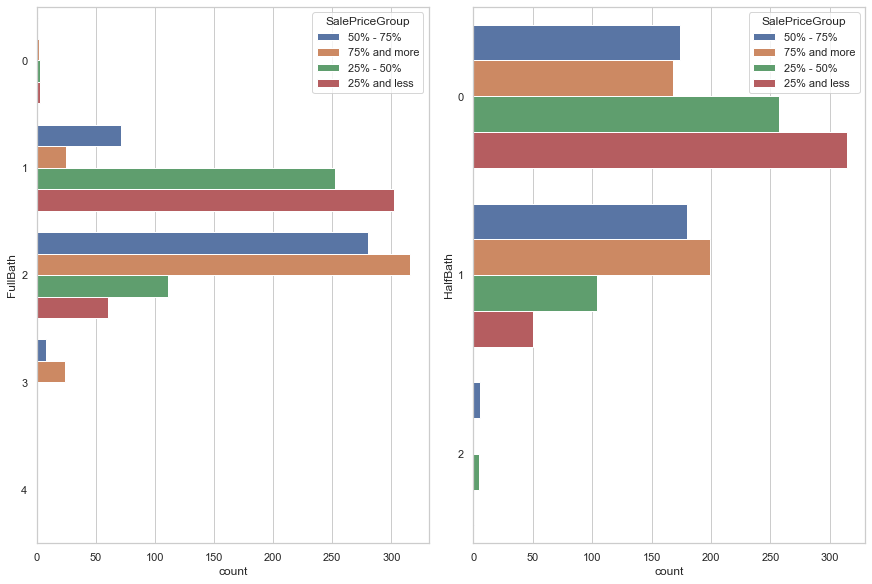

In [62]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=fullDf, y="FullBath", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="HalfBath", hue="SalePriceGroup", ax=ax[1])

#### Garage Properties

<AxesSubplot:xlabel='count', ylabel='GarageCars'>

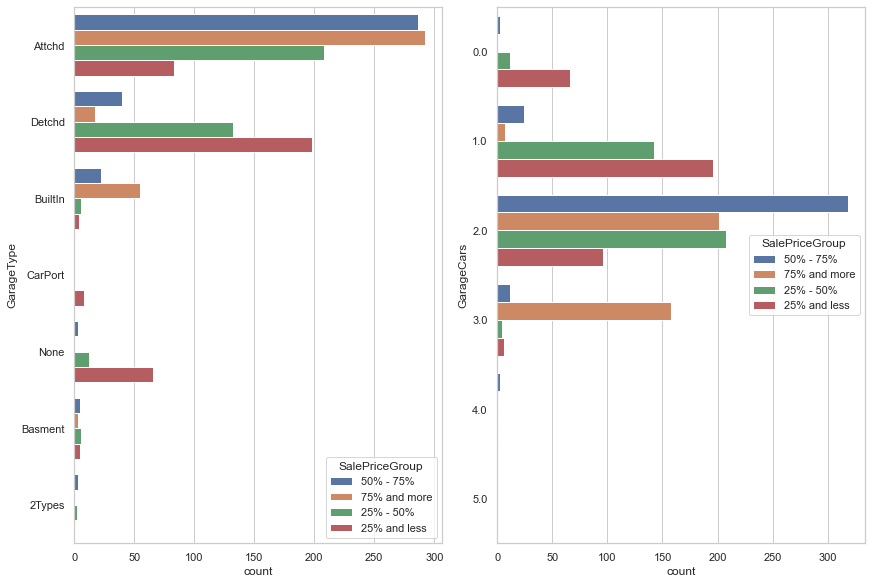

In [63]:
# Attached and Builtin garage types dominates among expensive houses (>50%). Their garages can contain 2 or 3 cars commonly. 
## Detached, CarPort types dominates among cheap houses (<50%). Their garage capacity is 1 car. No garages are also dominates among cheap houses.

fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=fullDf, y="GarageType", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="GarageCars", hue="SalePriceGroup", ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='GarageCond'>

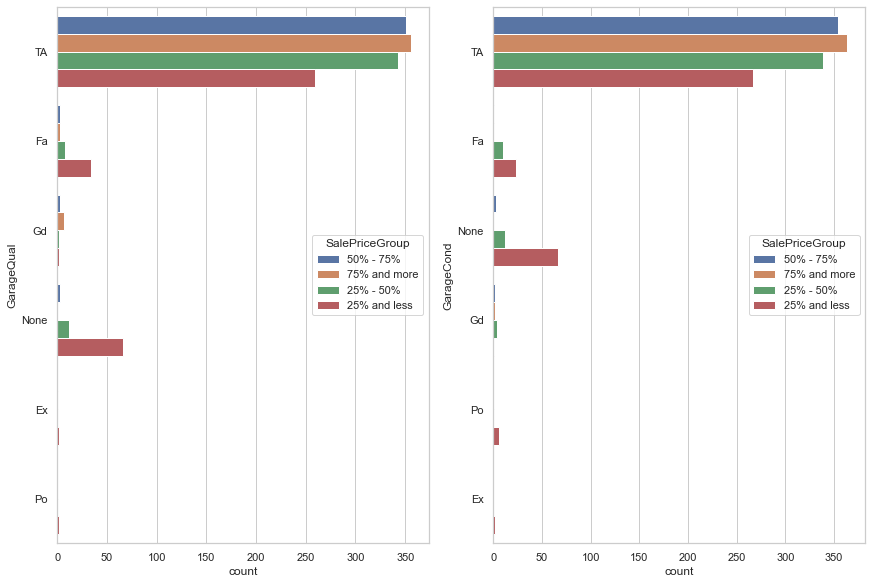

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="GarageQual", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="GarageCond", hue="SalePriceGroup", ax=ax[1])

<AxesSubplot:xlabel='count', ylabel='GarageFinish'>

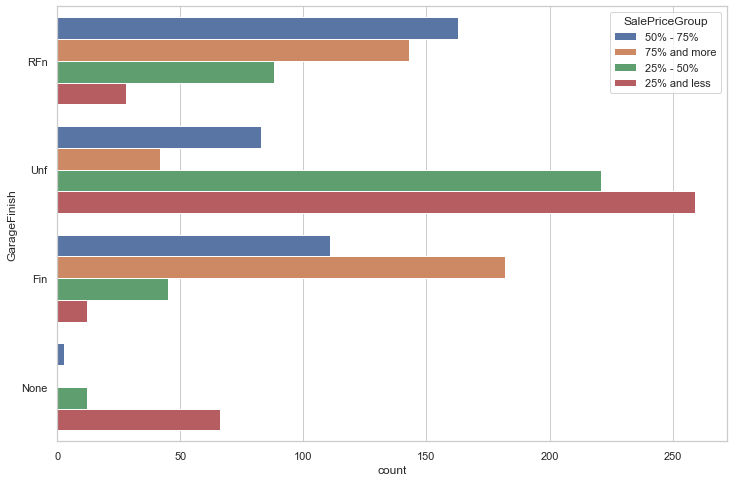

In [65]:
# Garage Finish correlates with house price. Most of the expensive houses (>50%) have garage finished or roughly finished. Unfinished garages were sold with cheap houses (<50%)

sns.countplot(data=fullDf, y="GarageFinish", hue="SalePriceGroup")

#### Fireplaces

<AxesSubplot:xlabel='count', ylabel='FireplaceQu'>

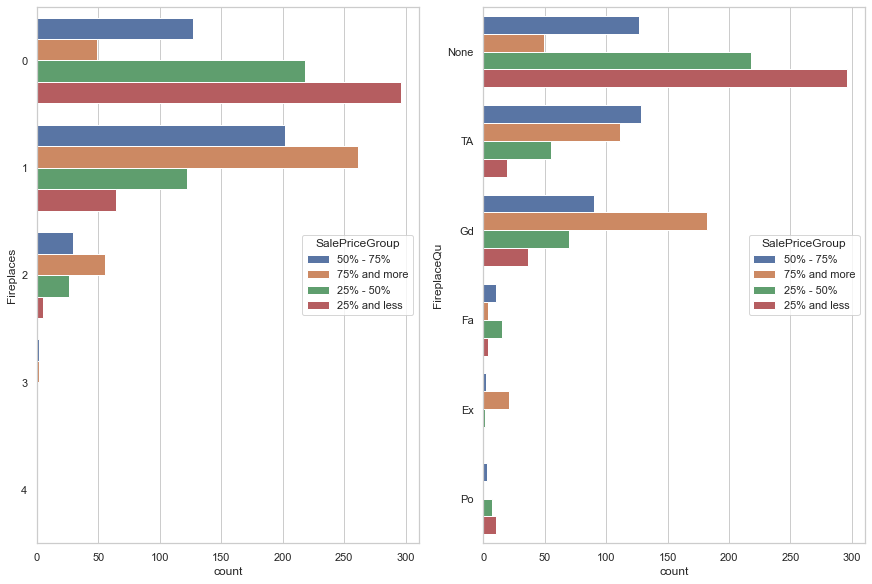

In [66]:
# Most of the cheap houses (<50%) don't have fireplaces or have one (most of the them are good or below avarage quality). Most of the expensive houses have 1 or 2 fireplaces with excellent, good or average quality.

fig, ax = plt.subplots(1, 2, constrained_layout=True)

sns.countplot(data=fullDf, y="Fireplaces", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="FireplaceQu", hue="SalePriceGroup", ax=ax[1])

#### Pool

<AxesSubplot:xlabel='count', ylabel='PoolQC'>

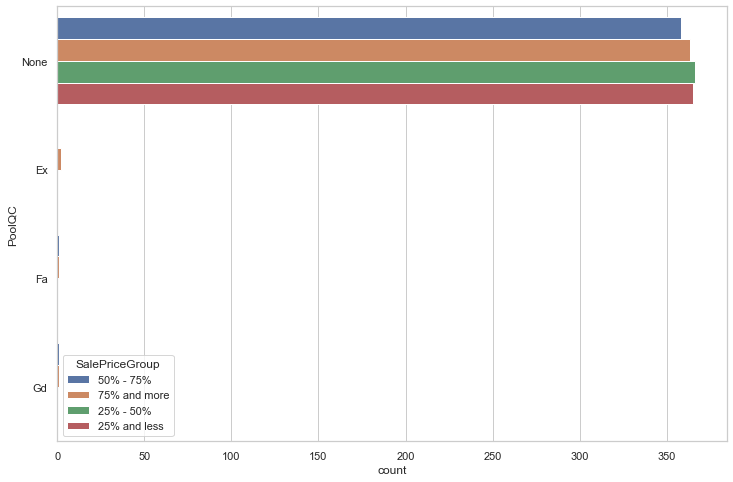

In [67]:
# Just a few lots have pools. None of houses that are cheaper than 25% have pools.
# There is an outlier with SalePrice < 50% and pool installed

sns.countplot(data=fullDf, y="PoolQC", hue="SalePriceGroup")

In [68]:
# Outlier

fullDf[(fullDf["SalePriceGroup"] == "25% - 50%") & (fullDf["PoolQC"] == 'Gd')][[
    'SalePrice',
    'PoolQC',
    'PoolArea',
    'TotRmsAbvGrd',
    'LotArea',
    'GrLivArea',
    'Neighborhood',
]]

Empty DataFrame
Columns: [SalePrice, PoolQC, PoolArea, TotRmsAbvGrd, LotArea, GrLivArea, Neighborhood]
Index: []

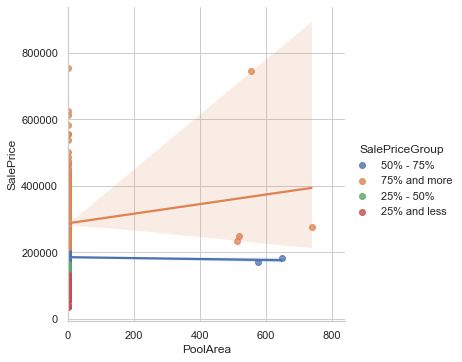

In [69]:
# ?
sns.lmplot(data=fullDf, x="PoolArea", y="SalePrice", hue="SalePriceGroup")

Fence

<AxesSubplot:xlabel='count', ylabel='Fence'>

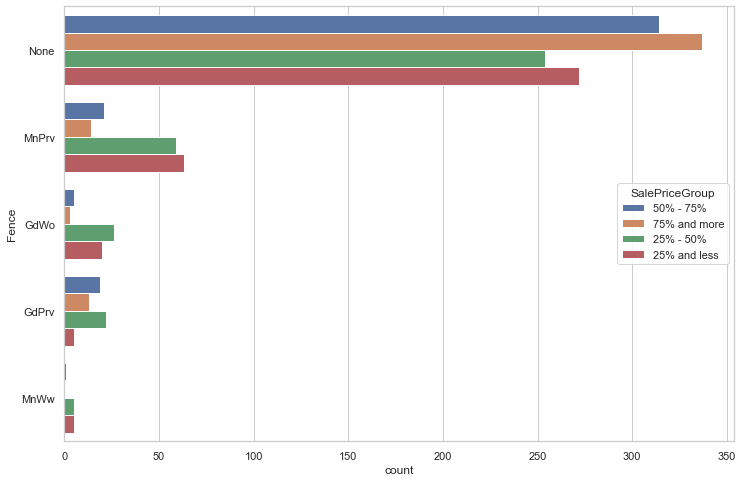

In [70]:
# Expensive houses (>50%) have good privacy/wood fences. Cheap houses (<50%) have minimal privacy/wood fences.

sns.countplot(data=fullDf, y="Fence", hue="SalePriceGroup")

Sale Information

<AxesSubplot:xlabel='count', ylabel='SaleCondition'>

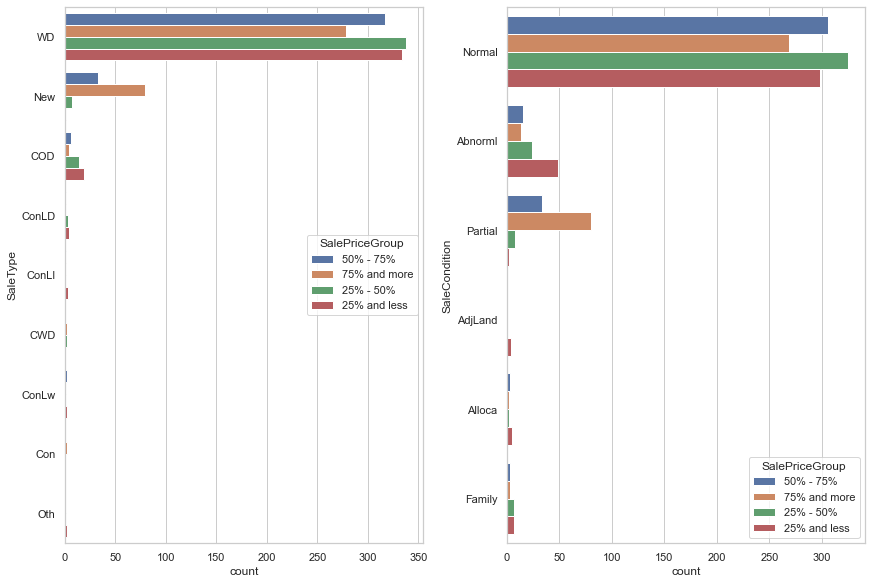

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

sns.countplot(data=fullDf, y="SaleType", hue="SalePriceGroup", ax=ax[0])
sns.countplot(data=fullDf, y="SaleCondition", hue="SalePriceGroup", ax=ax[1])

In [72]:
def imputeLivAreaSqFtPrice(saleInfo):
    totalLivingArea = saleInfo[0]
    salePrice = saleInfo[1]

    return salePrice / totalLivingArea

fullDf['LivAreaSqFtPrice'] = fullDf[['GrLivArea', 'SalePrice']].apply(imputeLivAreaSqFtPrice, axis=1)

<AxesSubplot:xlabel='MoSold,YrSold'>

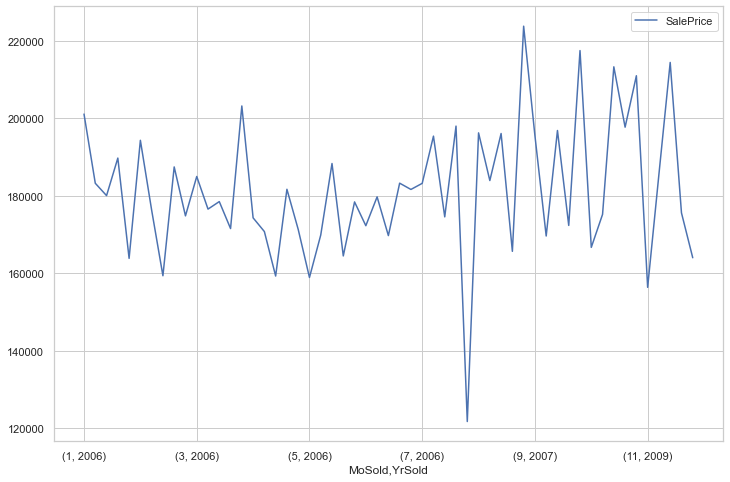

In [73]:
fullDf.groupby(['MoSold', 'YrSold'])[['SalePrice']].mean().plot()


## Feature Engineering

Now we need to help our models to reveal more complex relations between house components and SalePrice. Let's start from simple flags that indicate whenever a house has:
* 2nd floor
* Basement
* Garage
* Pool
* Porch
* Fence
* Fireplace
* Masonry Veneer

In [84]:
engineered_df = pd.DataFrame()

engineered_df['Has2ndFloor'] = full_df['2ndFlrSF'].apply(lambda x: int(x > 0))
engineered_df['HasBasement'] = full_df['TotalBsmtSF'].apply(lambda x: int(x > 0))
engineered_df['HasGarage'] = full_df['GarageArea'].apply(lambda x: int(x > 0))
engineered_df['HasPool'] = full_df['PoolArea'].apply(lambda x: int(x > 0))
engineered_df['HasFence'] = full_df['Fence'].apply(lambda x: int(x != 'None'))
engineered_df['HasFireplace'] = full_df['Fireplaces'].apply(lambda x: int(x > 0))
engineered_df['HasMansoryVeneer'] = full_df['MasVnrType'].apply(lambda x: int(x != 'None'))

Many house components have quality and condition metrics. Let's try to come up with a simple metrics that describes quantity-quality of components:

In [ ]:
# TBA

House itself and garage have specified years when they were built and/or renovate. This can help us to calculate how old they were at the time of sale:

In [ ]:
# TBA

Let's also create location interactions as they are important properties of each lot:

In [88]:
# TBA

In [100]:
engineered_features = list(engineered_df.columns.values)

full_df.join(engineered_df)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
0          856       854          0  None             3     1Fam       TA   
1         1262         0          0  None             3     1Fam       TA   
2          920       866          0  None             3     1Fam       TA   
3          961       756          0  None             3     1Fam       Gd   
4         1145      1053          0  None             4     1Fam       TA   
...        ...       ...        ...   ...           ...      ...      ...   
2914       546       546          0  None             3    Twnhs       TA   
2915       546       546          0  None             3   TwnhsE       TA   
2916      1224         0          0  None             4     1Fam       TA   
2917       970         0          0  None             3     1Fam       TA   
2918       996      1004          0  None             3     1Fam       TA   

     BsmtExposure  BsmtFinSF1  BsmtFinSF2  ... UtilitiesEnc SalePriceGroup  \
0              No       706.0         0.0  ...            0      50% - 75%   
1              Gd       978.0         0.0  ...            0      50% - 75%   
2              Mn       486.0         0.0  ...            0   75% and more   
3              No       216.0         0.0  ...            0      25% - 50%   
4              Av       655.0         0.0  ...            0   75% and more   
...           ...         ...         ...  ...          ...            ...   
2914           No         0.0         0.0  ...            0           None   
2915           No       252.0         0.0  ...            0           None   
2916           No      1224.0         0.0  ...            0           None   
2917           Av       337.0         0.0  ...            0           None   
2918           Av       758.0         0.0  ...            0           None   

      LivAreaSqFtPrice  Has2ndFloor HasBasement  HasGarage HasPool HasFence  \
0           121.929825            1           1          1       0        0   
1           143.819334            0           1          1       0        0   
2           125.139978            1           1          1       0        0   
3            81.537566            1           1          1       0        0   
4           113.739763            1           1          1       0        0   
...                ...          ...         ...        ...     ...      ...   
2914               NaN            1           1          0       0        0   
2915               NaN            1           1          1       0        0   
2916               NaN            0           1          1       0        0   
2917               NaN            0           1          0       0        1   
2918               NaN            1           1          1       0        0   

     HasFireplace HasMansoryVeneer  
0               0                1  
1               1                0  
2               1                1  
3               1                0  
4               1                1  
...           ...              ...  
2914            0                0  
2915            0                0  
2916            1                0  
2917            0                0  
2918            1                1  

[2917 rows x 133 columns]

## Feature Correlations

Before we go deep into feature relations, let's have an overview of feature correlations and importance (and specifically correlations with SalePrice):

In [109]:
 plt.figure(figsize=(80, 70))
 sns.heatmap(full_df[num_features + enc_cat_features + ['SalePrice']].corr(), annot=True, square=True, cmap='coolwarm')

KeyError: "['HasPool', 'HasFireplace', 'Has2ndFloor', 'HasFence', 'HasMansoryVeneer', 'HasBasement', 'HasGarage'] not in index"

ANOVA Results:

<AxesSubplot:xlabel='feature', ylabel='score'>

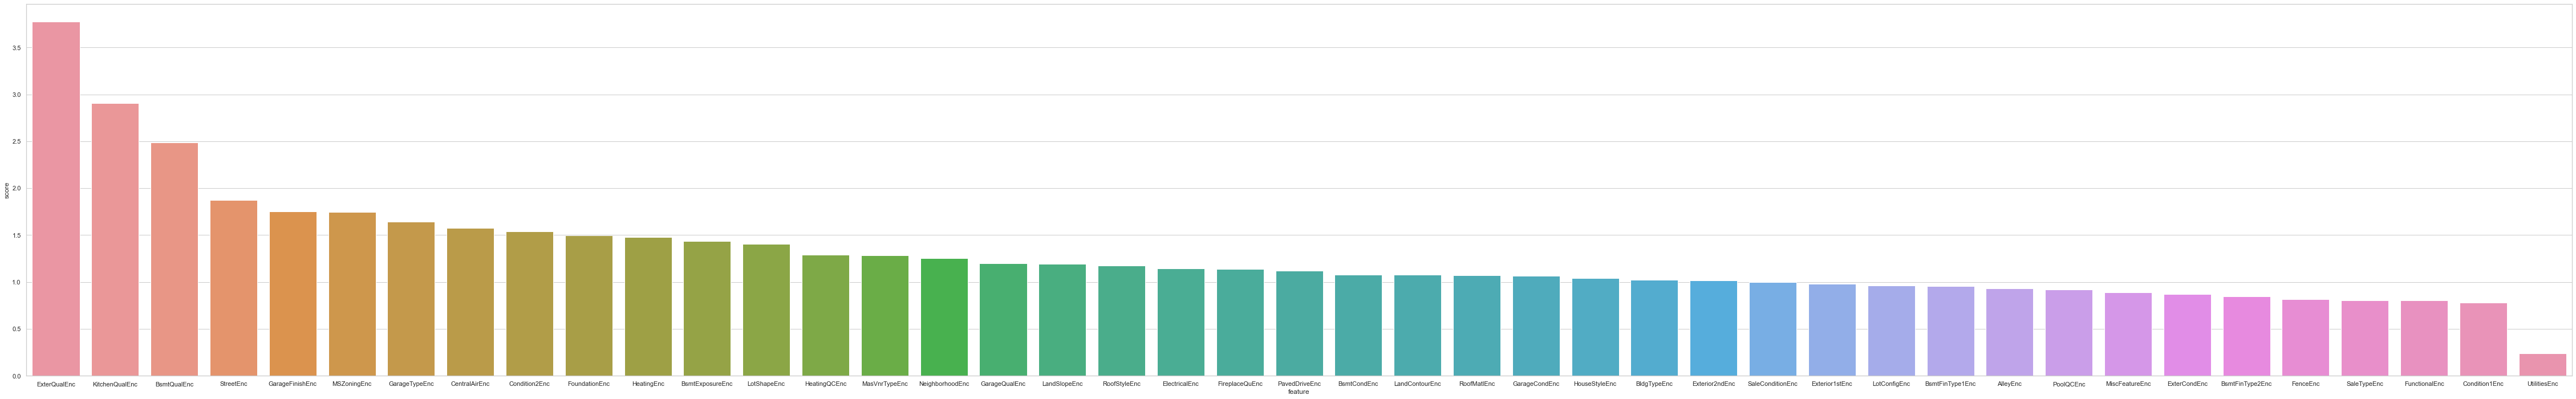

In [102]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

anova_feature_selector = SelectKBest(f_classif, k='all')
anova_feature_selector.fit(train_df[enc_cat_features], train_df['SalePrice'])

anova_feature_importance_df = pd.DataFrame({'feature': enc_cat_features, 'score': anova_feature_selector.scores_})
anova_feature_importance_df.sort_values(by=['score'], ascending=[0], inplace=True)

plt.figure(figsize=(80, 12))
sns.barplot(data=anova_feature_importance_df, x='feature', y='score')

Random Forest Selector Results:

<AxesSubplot:xlabel='feature', ylabel='score'>

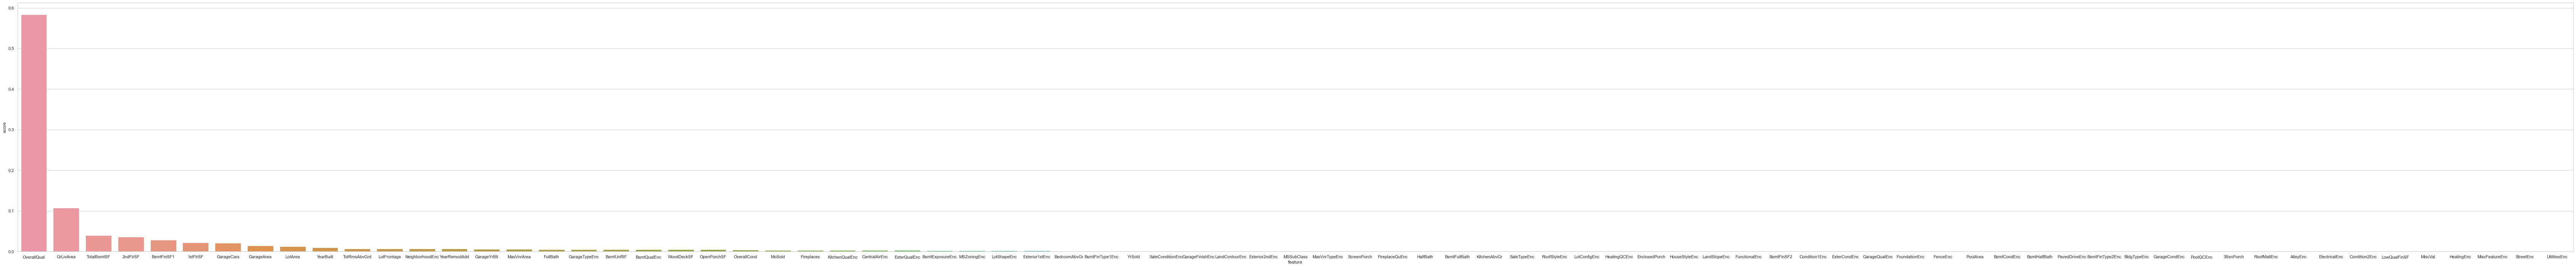

In [103]:
from sklearn.ensemble import RandomForestRegressor

random_forest_selector = RandomForestRegressor(
    max_depth=15,
    n_estimators=1700,
)

random_forest_selector.fit(train_df[num_features + enc_cat_features], train_df['SalePrice'])

rf_importance_df = pd.DataFrame({'feature': num_features + enc_cat_features, 'score': random_forest_selector.feature_importances_})
rf_importance_df.sort_values(by=['score'], ascending=[0], inplace=True)

plt.figure(figsize=(120, 12))
sns.barplot(data=rf_importance_df, x='feature', y='score')

Spearman Correlation Results:

<AxesSubplot:xlabel='corralation', ylabel='feature'>

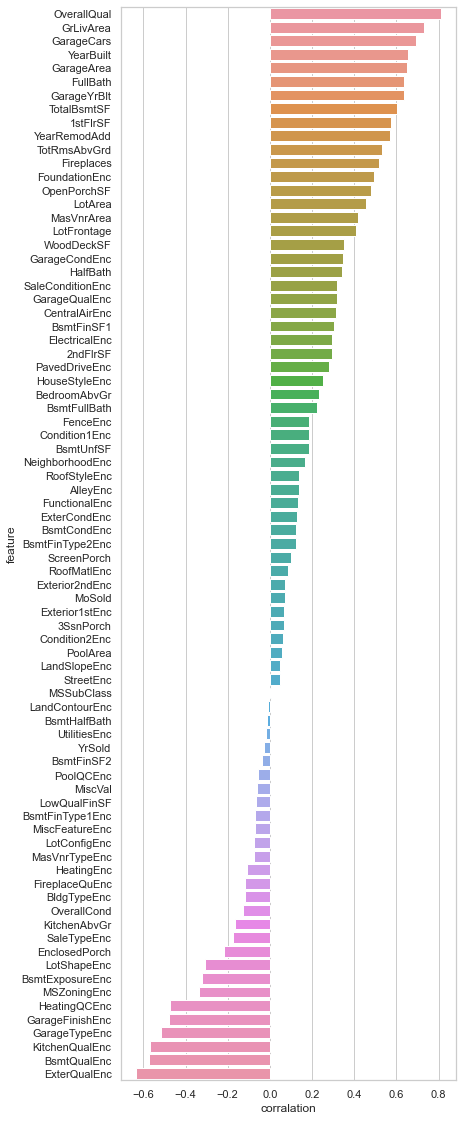

In [104]:
features = num_features + enc_cat_features

price_corr_df = pd.DataFrame()
price_corr_df['feature'] = features
price_corr_df['corralation'] = [train_df[feature].corr(train_df['SalePrice'], 'spearman') for feature in features]
price_corr_df.sort_values('corralation', ascending=[0], inplace=True)

plt.figure(figsize=(6, 0.25 * len(features)))
sns.barplot(data=price_corr_df, x='corralation', y='feature', orient='h')